In [1]:
import pandas as pd
from nltk.corpus import sentiwordnet as swn


df = pd.read_csv('filtered_fine_tune_res.csv')

# Initialize result dictionary
result_data = {'Participants': [], 'Signal': [], 'filtered_words': [], 'Final Sentiment': []}

# Extract filtered_tags column and split it into a single word list
for index, row in df.iterrows():
    words_list = str(row['filtered_tags']).split(',')

    # Remove empty strings
    words_list = [word for word in words_list if word.strip()]

    for item in words_list:
        words = item.split()
        contains_not = "not" in words  # check if include "not"

        total_pos = total_neg = 0
        count = 0
        for word in words:
            if word == 'not':
                continue
            senti_synsets = list(swn.senti_synsets(word))
            
            for synset in senti_synsets:
                total_pos += synset.pos_score()
                total_neg += synset.neg_score()
                count += 1

        avg_pos = avg_neg = 0
        if count != 0:
            avg_pos = total_pos / count
            avg_neg = total_neg / count
        elif contains_not:
            not_synsets = list(swn.senti_synsets('not', 'r'))
            avg_pos = not_synsets[0].pos_score()
            avg_neg = not_synsets[0].neg_score()

        #If it contains "not", reverse the emotional score or use the emotional score of "not" according to the situation
        if contains_not:
            if avg_pos == avg_neg:  # 中性
                not_synsets = list(swn.senti_synsets('not', 'r'))
                avg_pos = not_synsets[0].pos_score()
                avg_neg = not_synsets[0].neg_score()
            else:
                avg_pos, avg_neg = avg_neg, avg_pos

        
        final_sentiment = "Neutral"
        if avg_pos > 0.25 and avg_pos > avg_neg:
            final_sentiment = "Positive"
        elif avg_neg > 0.25 and avg_neg > avg_pos:
            final_sentiment = "Negative"

        result_data['Participants'].append(row['Participants'])
        result_data['Signal'].append(row['Signal'])
        result_data['filtered_words'].append(item)
        result_data['Final Sentiment'].append(final_sentiment)

# Convert the result dictionary to DataFrame and save it as a CSV file
result_df = pd.DataFrame(result_data)
result_df.to_csv("sentiment_results2.csv", index=False)


In [ ]:
## Divide positive and negative words
import pandas as pd


nrc_emotion = pd.read_csv('/Users/zhaozirui/Desktop/ASU-visiting student/11.2/NRC-Emotion-Lexicon.csv')

filtered_res = pd.read_csv('filtered_fine_tune_res.csv')

result_df = []

def get_sentiment(tag, emotion_df):
    emotion_row = emotion_df[emotion_df['Words'] == tag]
    
    if emotion_row.empty:
        return 'Neutral'
    
    # Count the number of 1's for Positive, Anticipation, Joy, Surprise, and Trust
    positive_count = emotion_row[['Positive', 'Anticipation', 'Joy', 'Surprise', 'Trust']].sum(axis=1).values[0]
    #positive_count = emotion_row[['Positive']].sum(axis=1).values[0]


    # Count the number of 1 for Negative, Anger, Distust, Fear, and Sadness
    negative_count = emotion_row[['Negative', 'Anger', 'Disgust', 'Fear', 'Sadness','Surprise']].sum(axis=1).values[0]
    #negative_count = emotion_row[['Negative']].sum(axis=1).values[0]

    
    print(tag,positive_count,negative_count)
    
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    elif positive_count == negative_count !=0:
        return 'Positive,Negative'
    else: 
        return 'Neutral'

for index, row in filtered_res.iterrows():
    tags = str(row['filtered_tags']).split(',')  # 将filtered_tags分成单个单词或词组，以逗号为分隔符
    for tag in tags:
        tag = tag.strip()
        
        if tag.startswith('not '):
            sentiment = get_sentiment(tag[4:], nrc_emotion)  # 考虑not后面的词
            # reverse sentiment
            if sentiment == 'Positive':
                sentiment = 'Negative'
            elif sentiment == 'Negative':
                sentiment = 'Positive'
        else:
            sentiment = get_sentiment(tag, nrc_emotion)
        
        result_df.append({
            'Participants': row['Participants'],
            'Signal': row['Signal'],
            'filtered_words': tag,
            'Final Sentiment': sentiment
        })

pd.DataFrame(result_df).to_csv('sentiment_results5.csv', index=False)


beach 1 0
friend 3 0
distressing 0 3
pleasant 5 1
pleasant 5 1
excited 5 1
satisfied 2 0
static 0 0
alien 0 3
massage 2 0
feeling 5 6
rhythm 1 0
regular 0 0
pulse 0 0
regular 0 0
distressed 0 2
urgent 2 3
alarm 1 3
important 2 0
soothing 3 0
alarm 1 3
familiar 2 0
regular 0 0
fluffy 0 0
indirect 0 0
regular 0 0
intense 4 5
alarm 1 3
unpleasant 0 3
pleasant 5 1
constant 2 0
oppression 0 5
oppressive 0 5
empty 0 0
feeling 5 6
train 0 0
horse 1 0
excited 5 1
alarming 1 3
train 0 0
soothing 3 0
train 0 0
passive 0 1
satisfied 2 0
game 0 0
shaving 0 0
constant 2 0
pulse 0 0
steady 2 1
urgent 2 3
club 0 0
shaving 0 0
sensation 0 0
constant 2 0
printer 0 0
printing 0 0
rhythm 1 0
satisfied 2 0
mundane 0 0
laundry 0 0
boredom 0 2
satisfaction 0 0
passenger 1 0
distressed 0 2
unpleasant 0 3
boring 0 1
excited 5 1
dominant 0 2
neutral 2 0
balloon 0 0
numb 0 1
distressed 0 2
satisfied 2 0
interchangeable 0 0
waiting 0 0
vibration 0 0
quiet 1 1
quiet 1 1
water 0 0
excited 5 1
boring 0 1
distressed

not cold-->hotness
not slippery-->nonslippery
not stressful-->not stressful
not hurt-->be_well
not disruptive-->not disruptive
not annoyed-->not annoyed
not sad-->glad
not uncomfortable-->comfortable
not distressed-->euphoric
not dangerous-->safe
not anxious-->not anxious
not angry-->unangry
not unpleasant-->pleasant
not negative-->affirmative
not distressing-->not distressing
Missing words: be_well in phrase: 'be_well'
Missing words: nonslippery in phrase: 'nonslippery'
Missing words: unangry in phrase: 'unangry'


/Users/zhaozirui/spacy_nlp/.venv/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


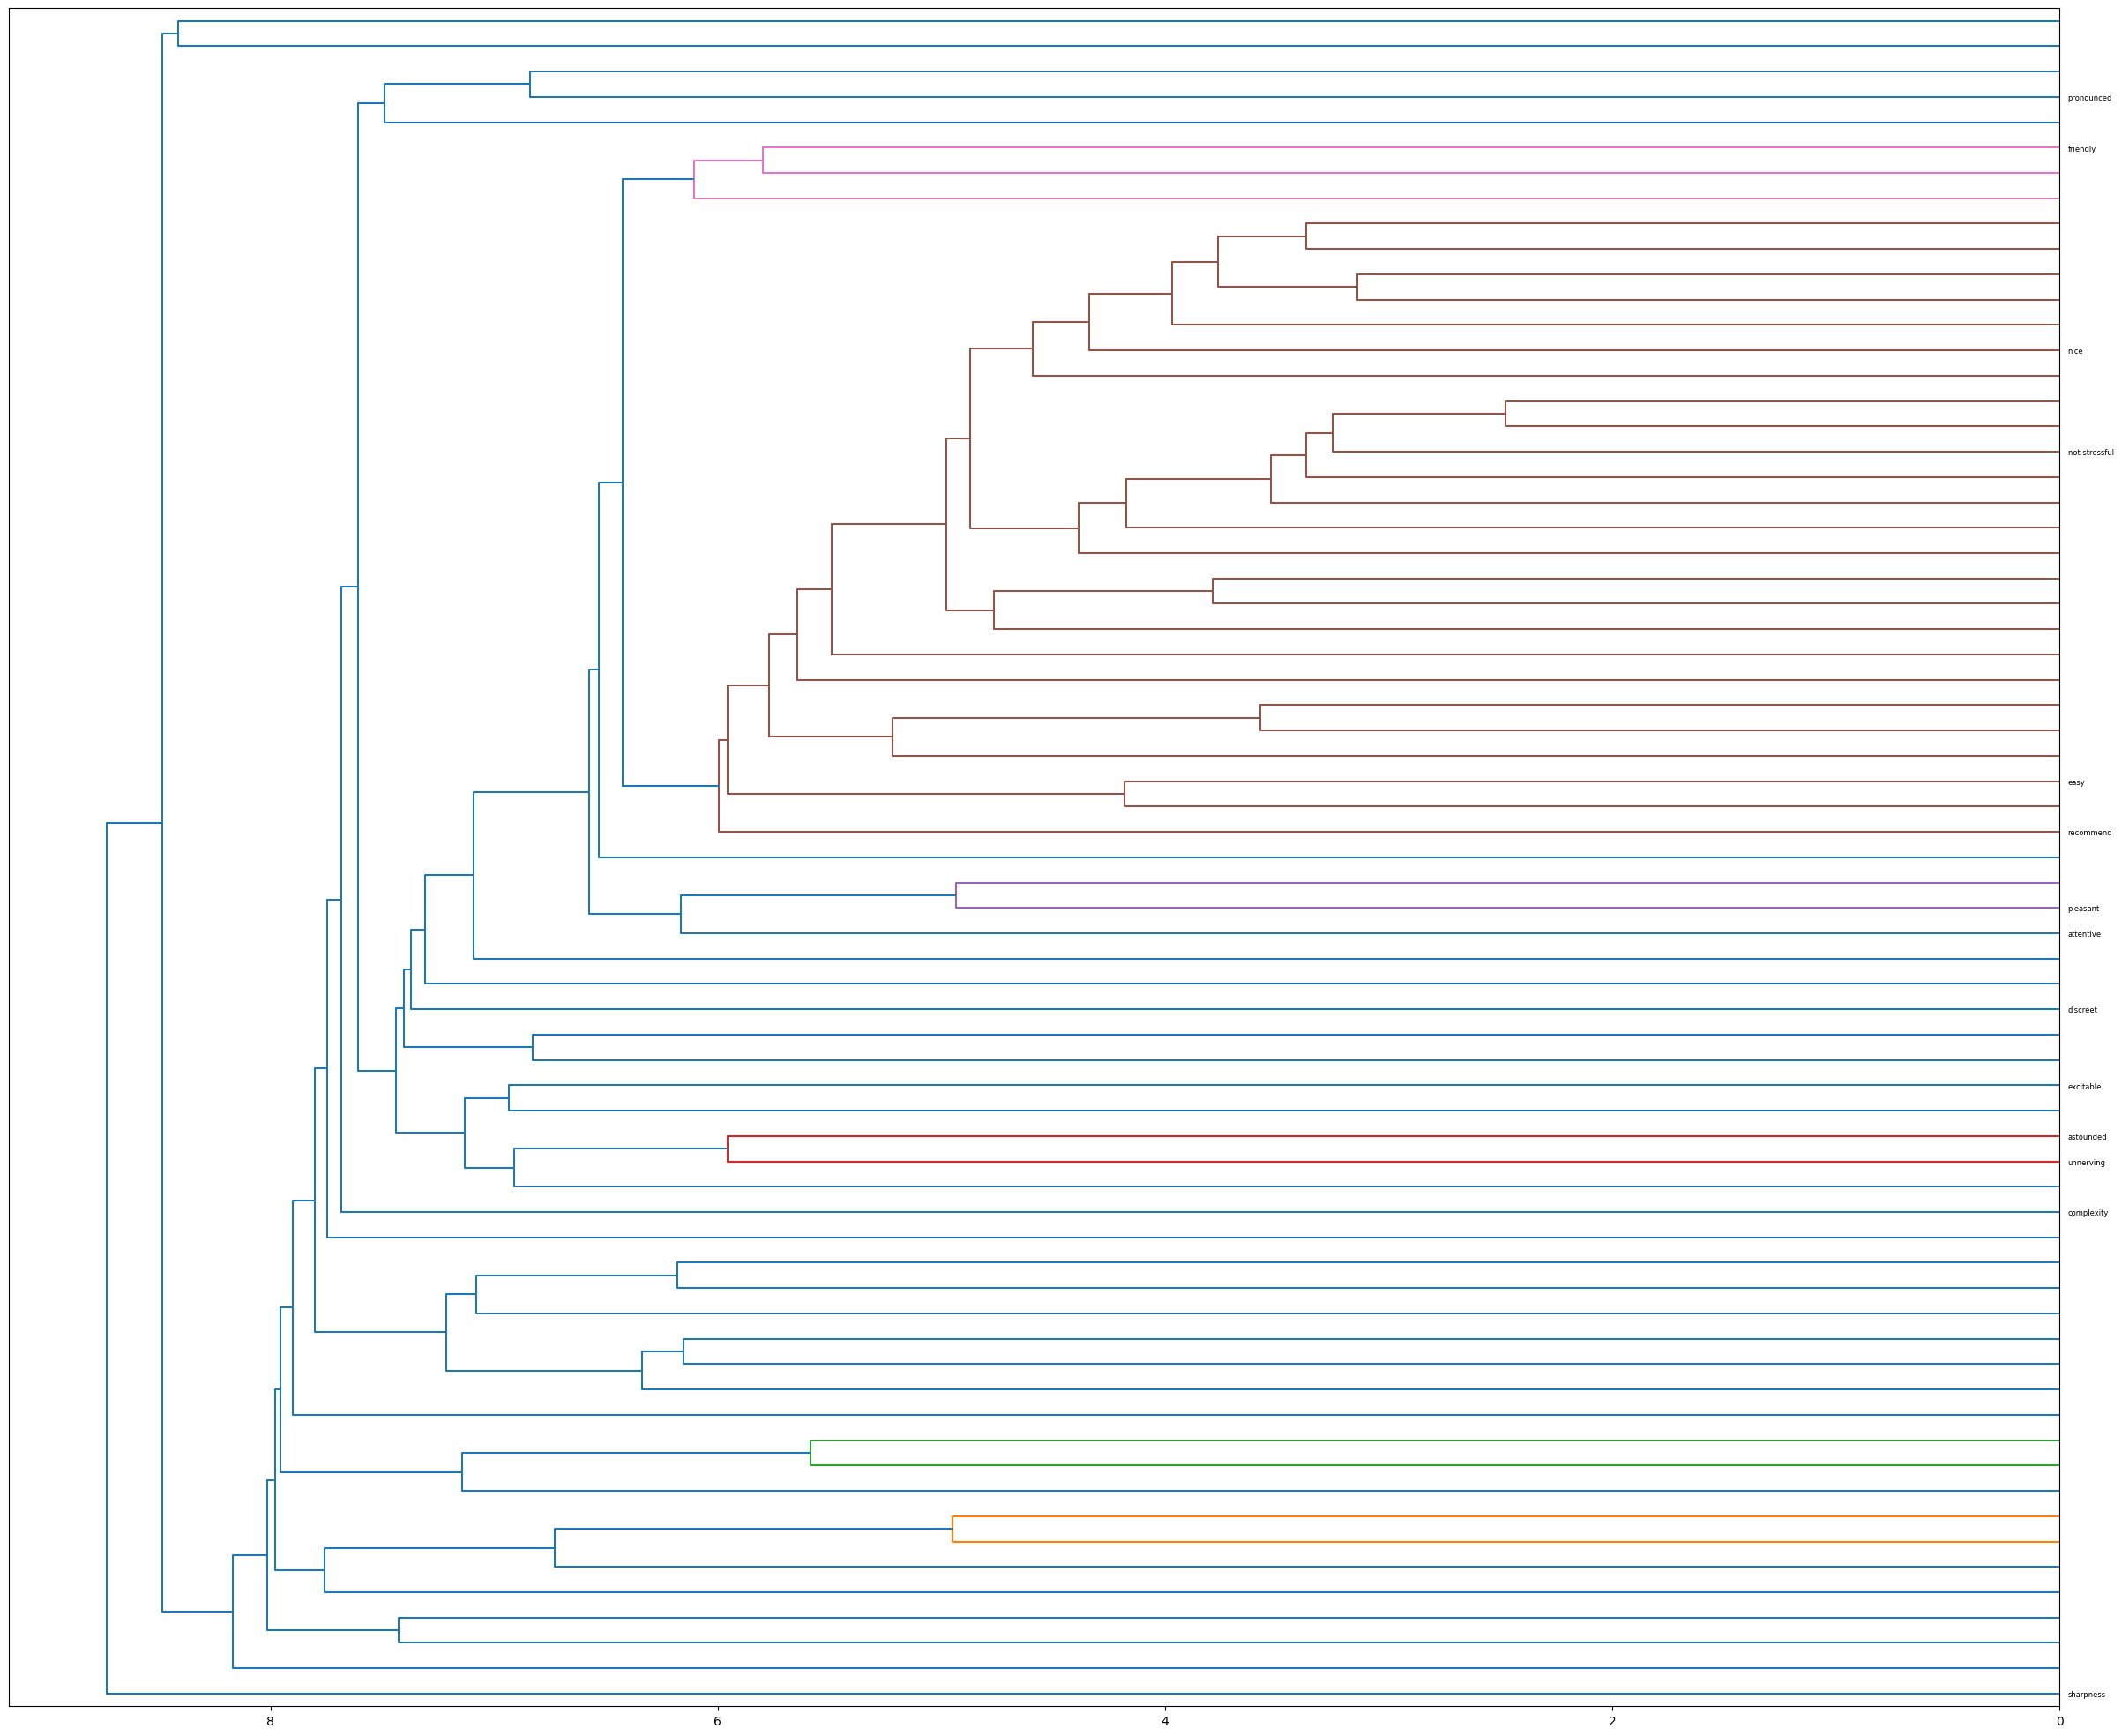

In [ ]:
## Method1:GloVe
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet

def load_glove(path):
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = ''.join(values[:-300])
            vector = np.asarray(values[-300:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove('/Users/zhaozirui/Downloads/glove.840B.300d.txt')

def get_phrase_embedding(phrase, embeddings):
    words = phrase.split()
    vectors = []
    missing_words = []
    for word in words:
        emb = embeddings.get(word)
        if emb is not None:
            vectors.append(emb)
        else:
            missing_words.append(word)
    if missing_words:
        print(f"Missing words: {', '.join(missing_words)} in phrase: '{phrase}'")
        return None
    return np.mean(vectors, axis=0)

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'not ' + word

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('sentiment_results2.csv')
positive_df = df[df['Final Sentiment'] == 'Positive'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings1 = []
valid_phrases1 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []
for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1])  # 获取"not"后面词的反义词
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
        else:
            processed_phrases.append(phrase)
    else:
        print(f"Skipping non-string value: {phrase}")
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:
    
    embedding = get_phrase_embedding(phrase, glove_embeddings)
    if embedding is not None:
        valid_embeddings1.append(embedding)
        valid_phrases1.append(phrase)
    else:
        missing_phrases.append(phrase)

#cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings)
#linked = linkage(valid_embeddings, method='ward')
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0,affinity='cosine',linkage='average').fit(valid_embeddings1)

linked = linkage(valid_embeddings1, method='average')
plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases1)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()


not angry-->unangry
not dangerous-->safe
not sad-->glad
not anxious-->not anxious
not disruptive-->not disruptive
not stressful-->not stressful
not distressed-->euphoric
not cold-->hotness
not uncomfortable-->comfortable
not hurt-->be_well
not distressing-->not distressing
not annoyed-->not annoyed
not negative-->affirmative
not slippery-->nonslippery
not unpleasant-->pleasant
Missing words: nonslippery in phrase: 'nonslippery'
Missing words: be_well in phrase: 'be_well'
Missing words: unangry in phrase: 'unangry'


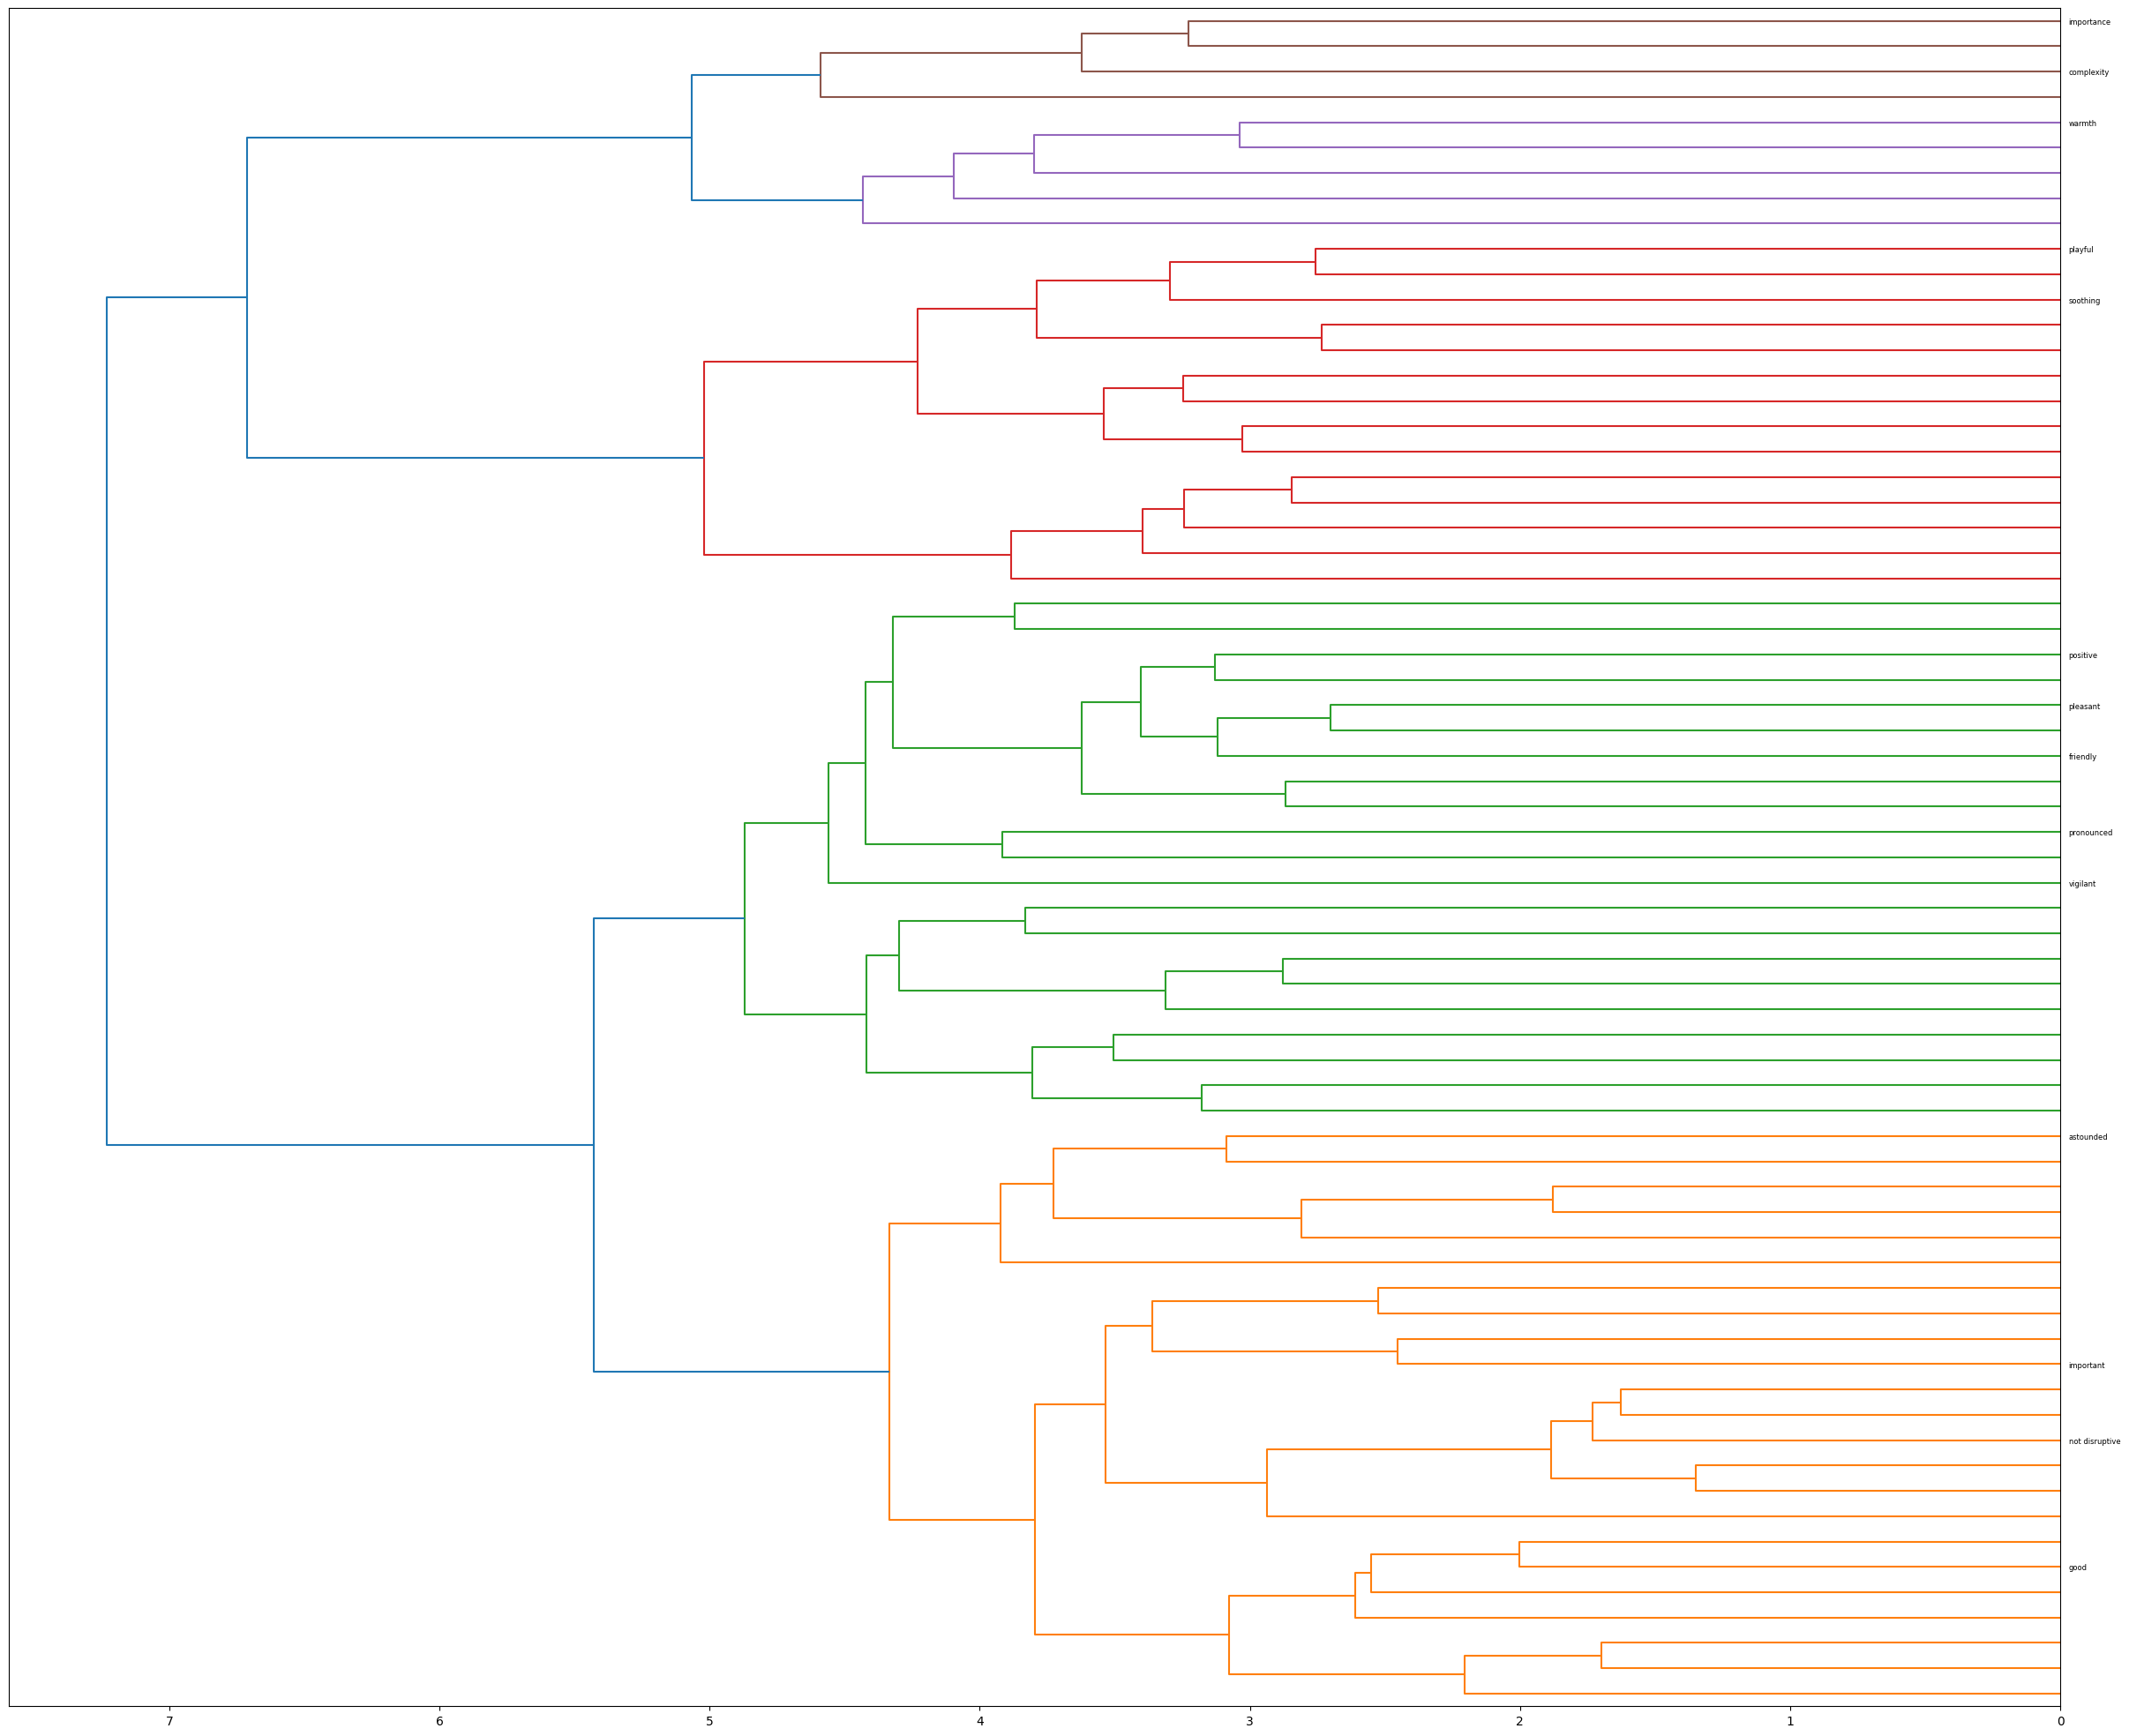

In [ ]:
## Method2:word2vec
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from gensim.models import KeyedVectors

# 用于加载预训练的Word2Vec模型
def load_word2vec(path):
    return KeyedVectors.load_word2vec_format(path, binary=True)

# 用预训练的Word2Vec模型替换您的GloVe路径
word2vec_embeddings = load_word2vec('/Users/zhaozirui/Downloads/GoogleNews-vectors-negative300.bin')


# 修改get_phrase_embedding函数以使用Word2Vec嵌入
def get_phrase_embedding(phrase, embeddings):
    words = phrase.split()
    vectors = []
    missing_words = []
    for word in words:
        try:
            emb = embeddings[word]
            vectors.append(emb)
        except KeyError:
            missing_words.append(word)
    if missing_words:
        print(f"Missing words: {', '.join(missing_words)} in phrase: '{phrase}'")
        return None
    return np.mean(vectors, axis=0)

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'not ' + word

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('sentiment_results2.csv')
positive_df = df[df['Final Sentiment'] == 'Positive'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings2 = []
valid_phrases2 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []
for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1])  # Get the antonym of the word after "not"
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
        else:
            processed_phrases.append(phrase)
    else:
        print(f"Skipping non-string value: {phrase}")
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:
    # When dealing with phrase embeddings, use fasttext_embedding replaces glove_embeddings
    embedding = get_phrase_embedding(phrase, word2vec_embeddings)
    if embedding is not None:
        valid_embeddings2.append(embedding)
        valid_phrases2.append(phrase)
    else:
        missing_phrases.append(phrase)
        

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings2)

linked = linkage(valid_embeddings2, method='ward')
plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases2)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()


not distressing-->undistressing
not hurt-->be_well
not slippery-->nonslippery
not sad-->glad
not annoyed-->unannoyed
not stressful-->unstressful
not negative-->affirmative
not disruptive-->undisruptive
not distressed-->euphoric
not cold-->hotness
not uncomfortable-->comfortable
not dangerous-->safe
not unpleasant-->pleasant
not angry-->unangry
not anxious-->unanxious


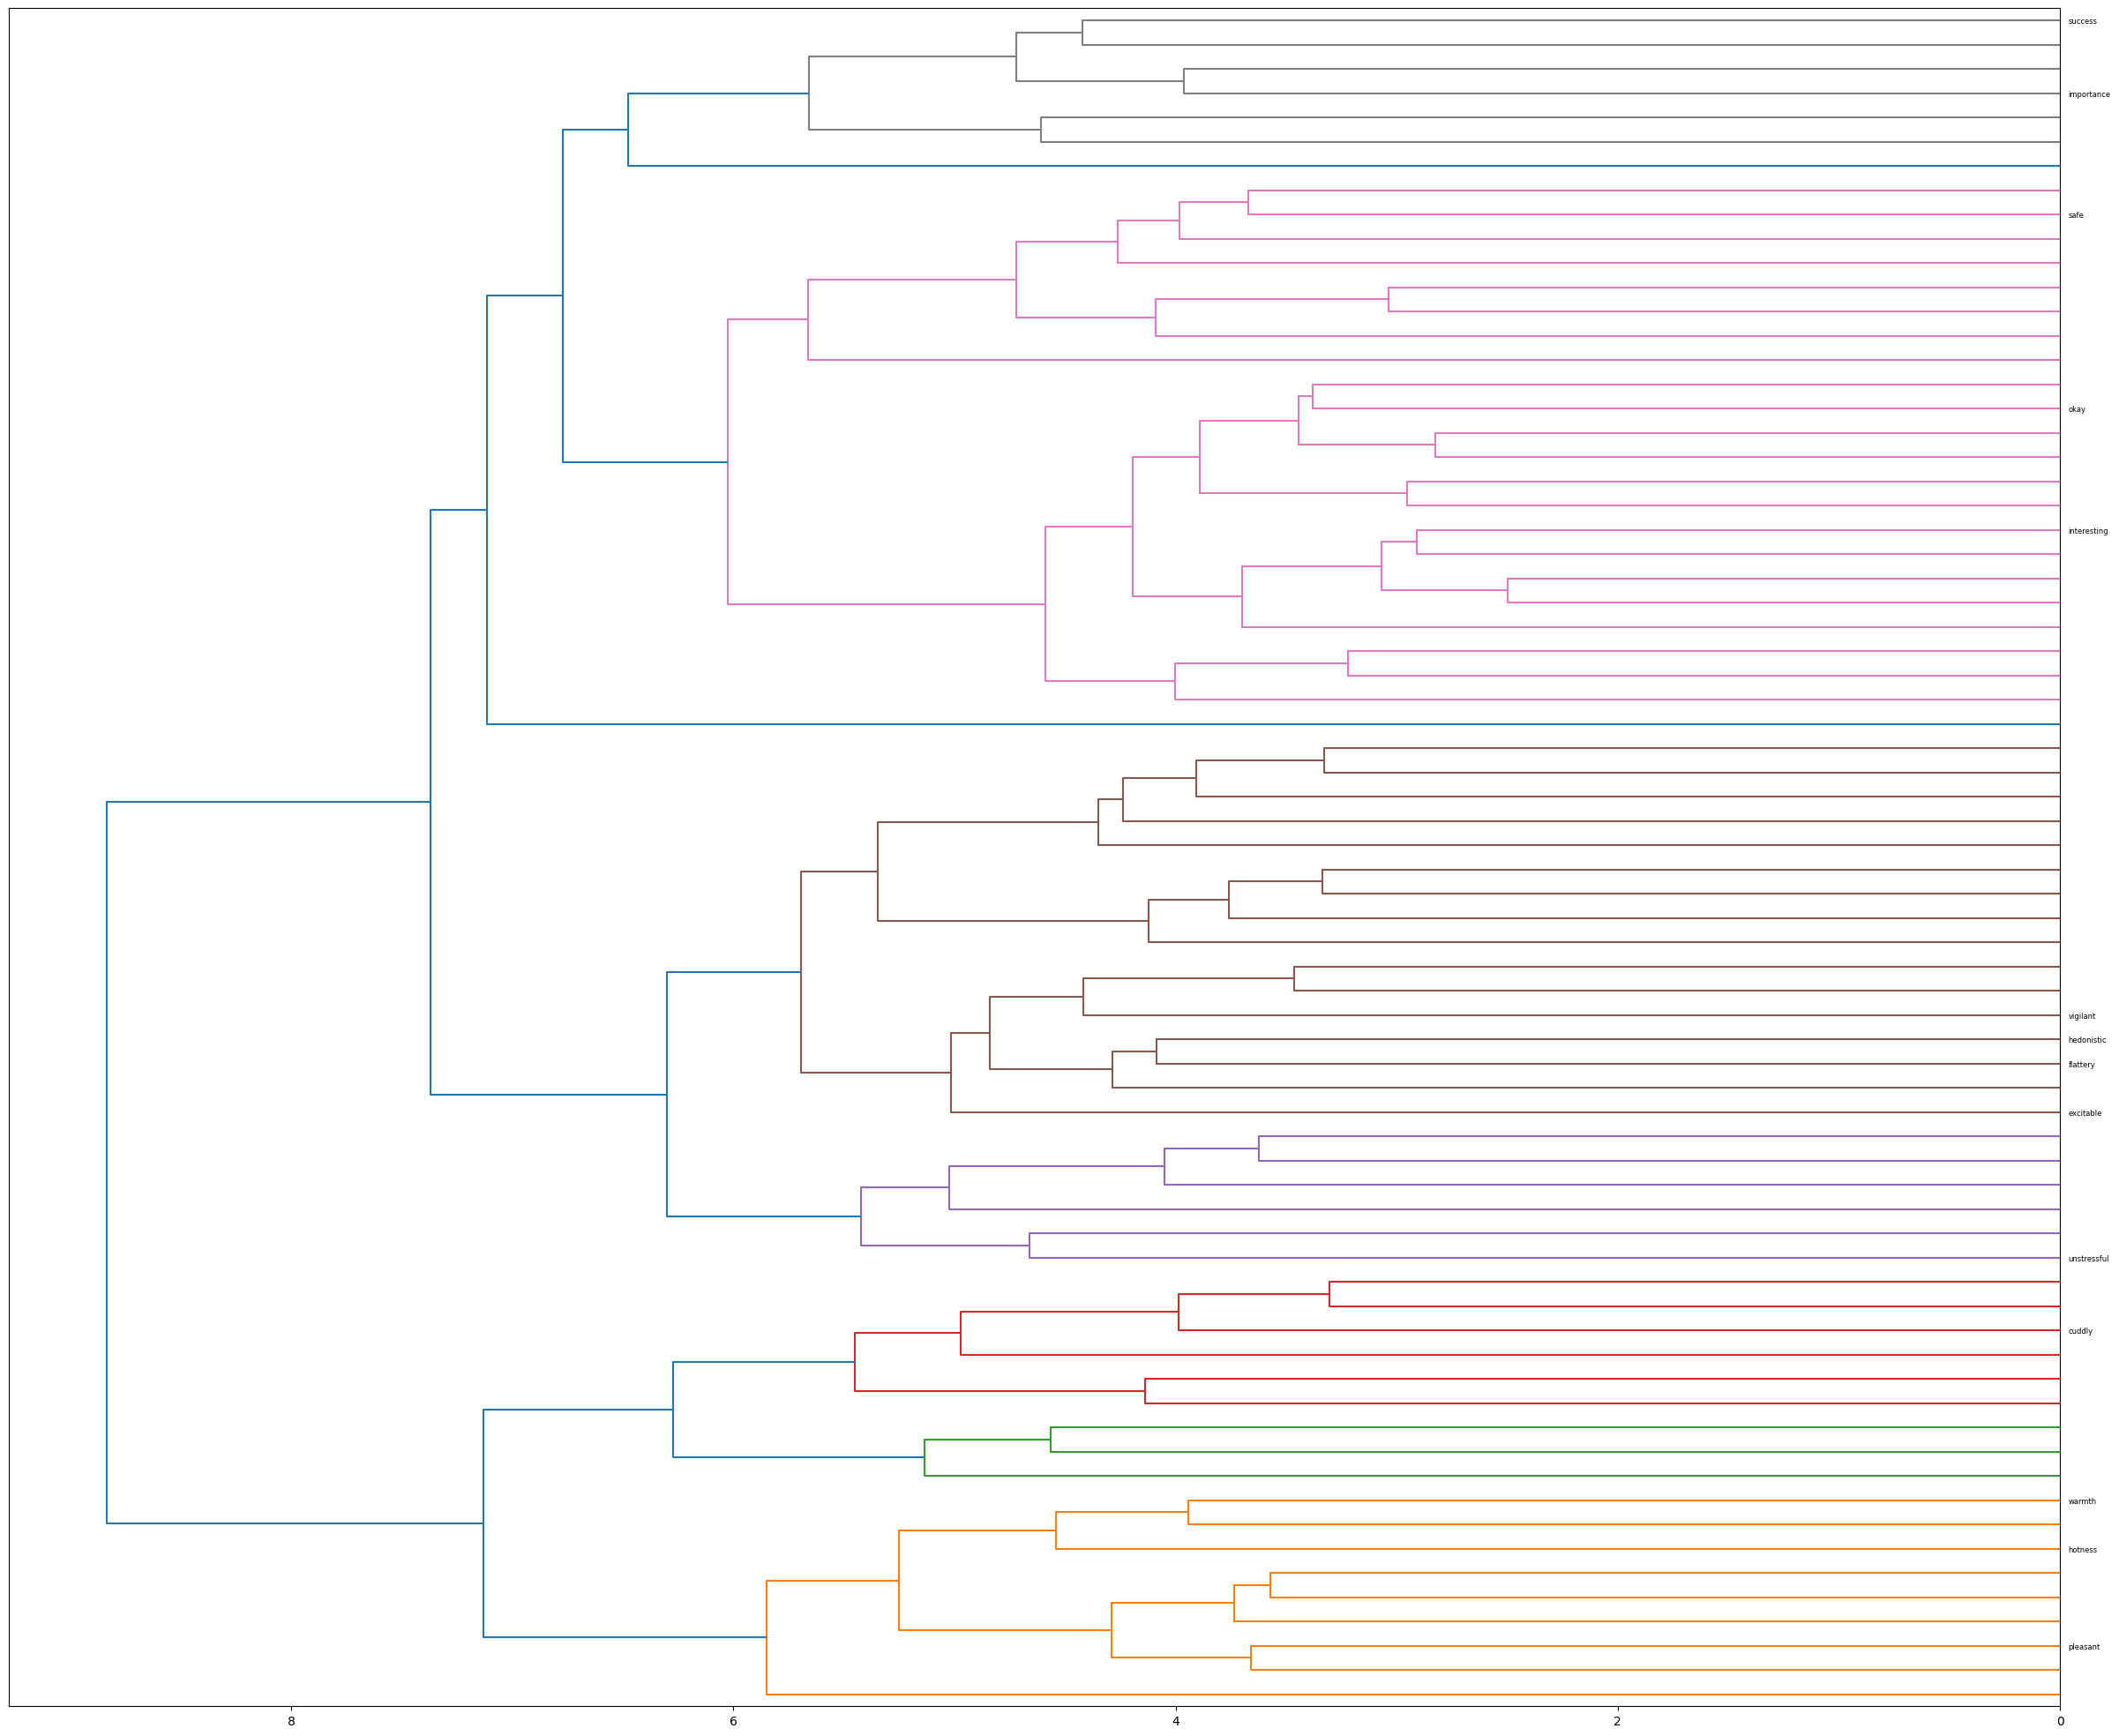

In [ ]:
## FastText
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
import fasttext

# Use the pre-trained FastText model instead of your GloVe path
fasttext_model = fasttext.load_model('/Users/zhaozirui/Downloads/wiki.en/wiki.en.bin')

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'un' + word

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('sentiment_results2.csv')
positive_df = df[df['Final Sentiment'] == 'Positive'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings3 = []
valid_phrases3 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []
for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1]) 
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
        else:
            processed_phrases.append(phrase)
    else:
        print(f"Skipping non-string value: {phrase}")
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:
    # Process phrase embeddings using fasttext_model
    embedding = fasttext_model.get_word_vector(phrase)
    if embedding is not None:
        valid_embeddings3.append(embedding)
        valid_phrases3.append(phrase)
    else:
        missing_phrases.append(phrase)
        

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=5).fit(valid_embeddings3)

linked = linkage(valid_embeddings3, method='ward')
plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases3)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()


In [ ]:
import fasttext

# Use the pre-trained FastText model instead of your GloVe path
fasttext_embeddings = fasttext.load_model('/Users/zhaozirui/Downloads/cc.en.300.bin')
# 获取单词的词向量
word = "example"
word_vector = fasttext_embeddings.get_word_vector(word)

print(f"Vector for word '{word}':\n{word_vector}")

Vector for word 'example':
[-3.01899910e-02  1.67307898e-03 -3.39188091e-02  1.29165754e-04
 -3.39024775e-02 -3.52627262e-02  5.44663481e-02 -2.15502288e-02
  1.57393347e-02 -5.50850853e-03 -9.77861509e-03  6.96822815e-03
  1.34404376e-02  4.04827148e-02 -5.77299595e-02  2.67399456e-02
  4.28873971e-02  1.72743984e-02  5.14067225e-02  4.15806361e-02
 -3.46253510e-03 -4.39561009e-02  4.55061607e-02 -4.61385176e-02
 -6.82864487e-02 -1.10961404e-02  1.33144371e-02  2.14999523e-02
  8.21126904e-03 -5.76011557e-03  1.62116960e-02  6.52960828e-03
  7.23410025e-03 -5.48320338e-02 -1.13268523e-02 -9.41580534e-03
  3.99618335e-02 -5.51603436e-02 -4.69672195e-05 -5.19470498e-02
 -3.15293521e-02 -4.06791782e-03 -5.40495440e-02 -1.99173968e-02
 -8.28304701e-03  4.20339815e-02  2.26341262e-02 -1.23577183e-02
  1.77250840e-02  2.66364366e-02  2.01242566e-02  1.41719412e-02
 -4.94768023e-02  3.80847923e-04  1.61610469e-02 -3.24339680e-02
 -5.72527312e-02 -1.43544767e-02 -1.18667241e-02 -3.18274871e-0

not familiar-->unfamiliar
not open-->close
not equal-->differ
not sharp-->dull
not available-->unavailable
not bored-->interest
not excited-->stifle
not communication-->uncommunication
not trust-->distrust
not alarming-->unalarming
not intentional-->undesigned
not glass-->unglass
not touching-->untouching
not smooth-->roughen
not concentrating-->decentralize
not sticky-->unsticky
not aggressive-->unaggressive
not strong-->weak
not directly-->indirectly
not passive-->active_voice
not textured-->untextured
not necessarily-->unnecessarily
not focusing-->blur
not dominant-->subordinate
not relaxing-->tense
not getting-->leave
not right-->left
not light-->dark
not welcome-->say_farewell
not continuous-->discontinuous
not much-->little
not correct-->falsify
not still-->agitate
Skipping non-string value: nan
not ringing-->unringing
not pushing-->pull
not depressed-->elate
not natural-->unnatural
not uniform-->multiform
not electric-->unelectric
not involved-->obviate
not consistent-->inconsis

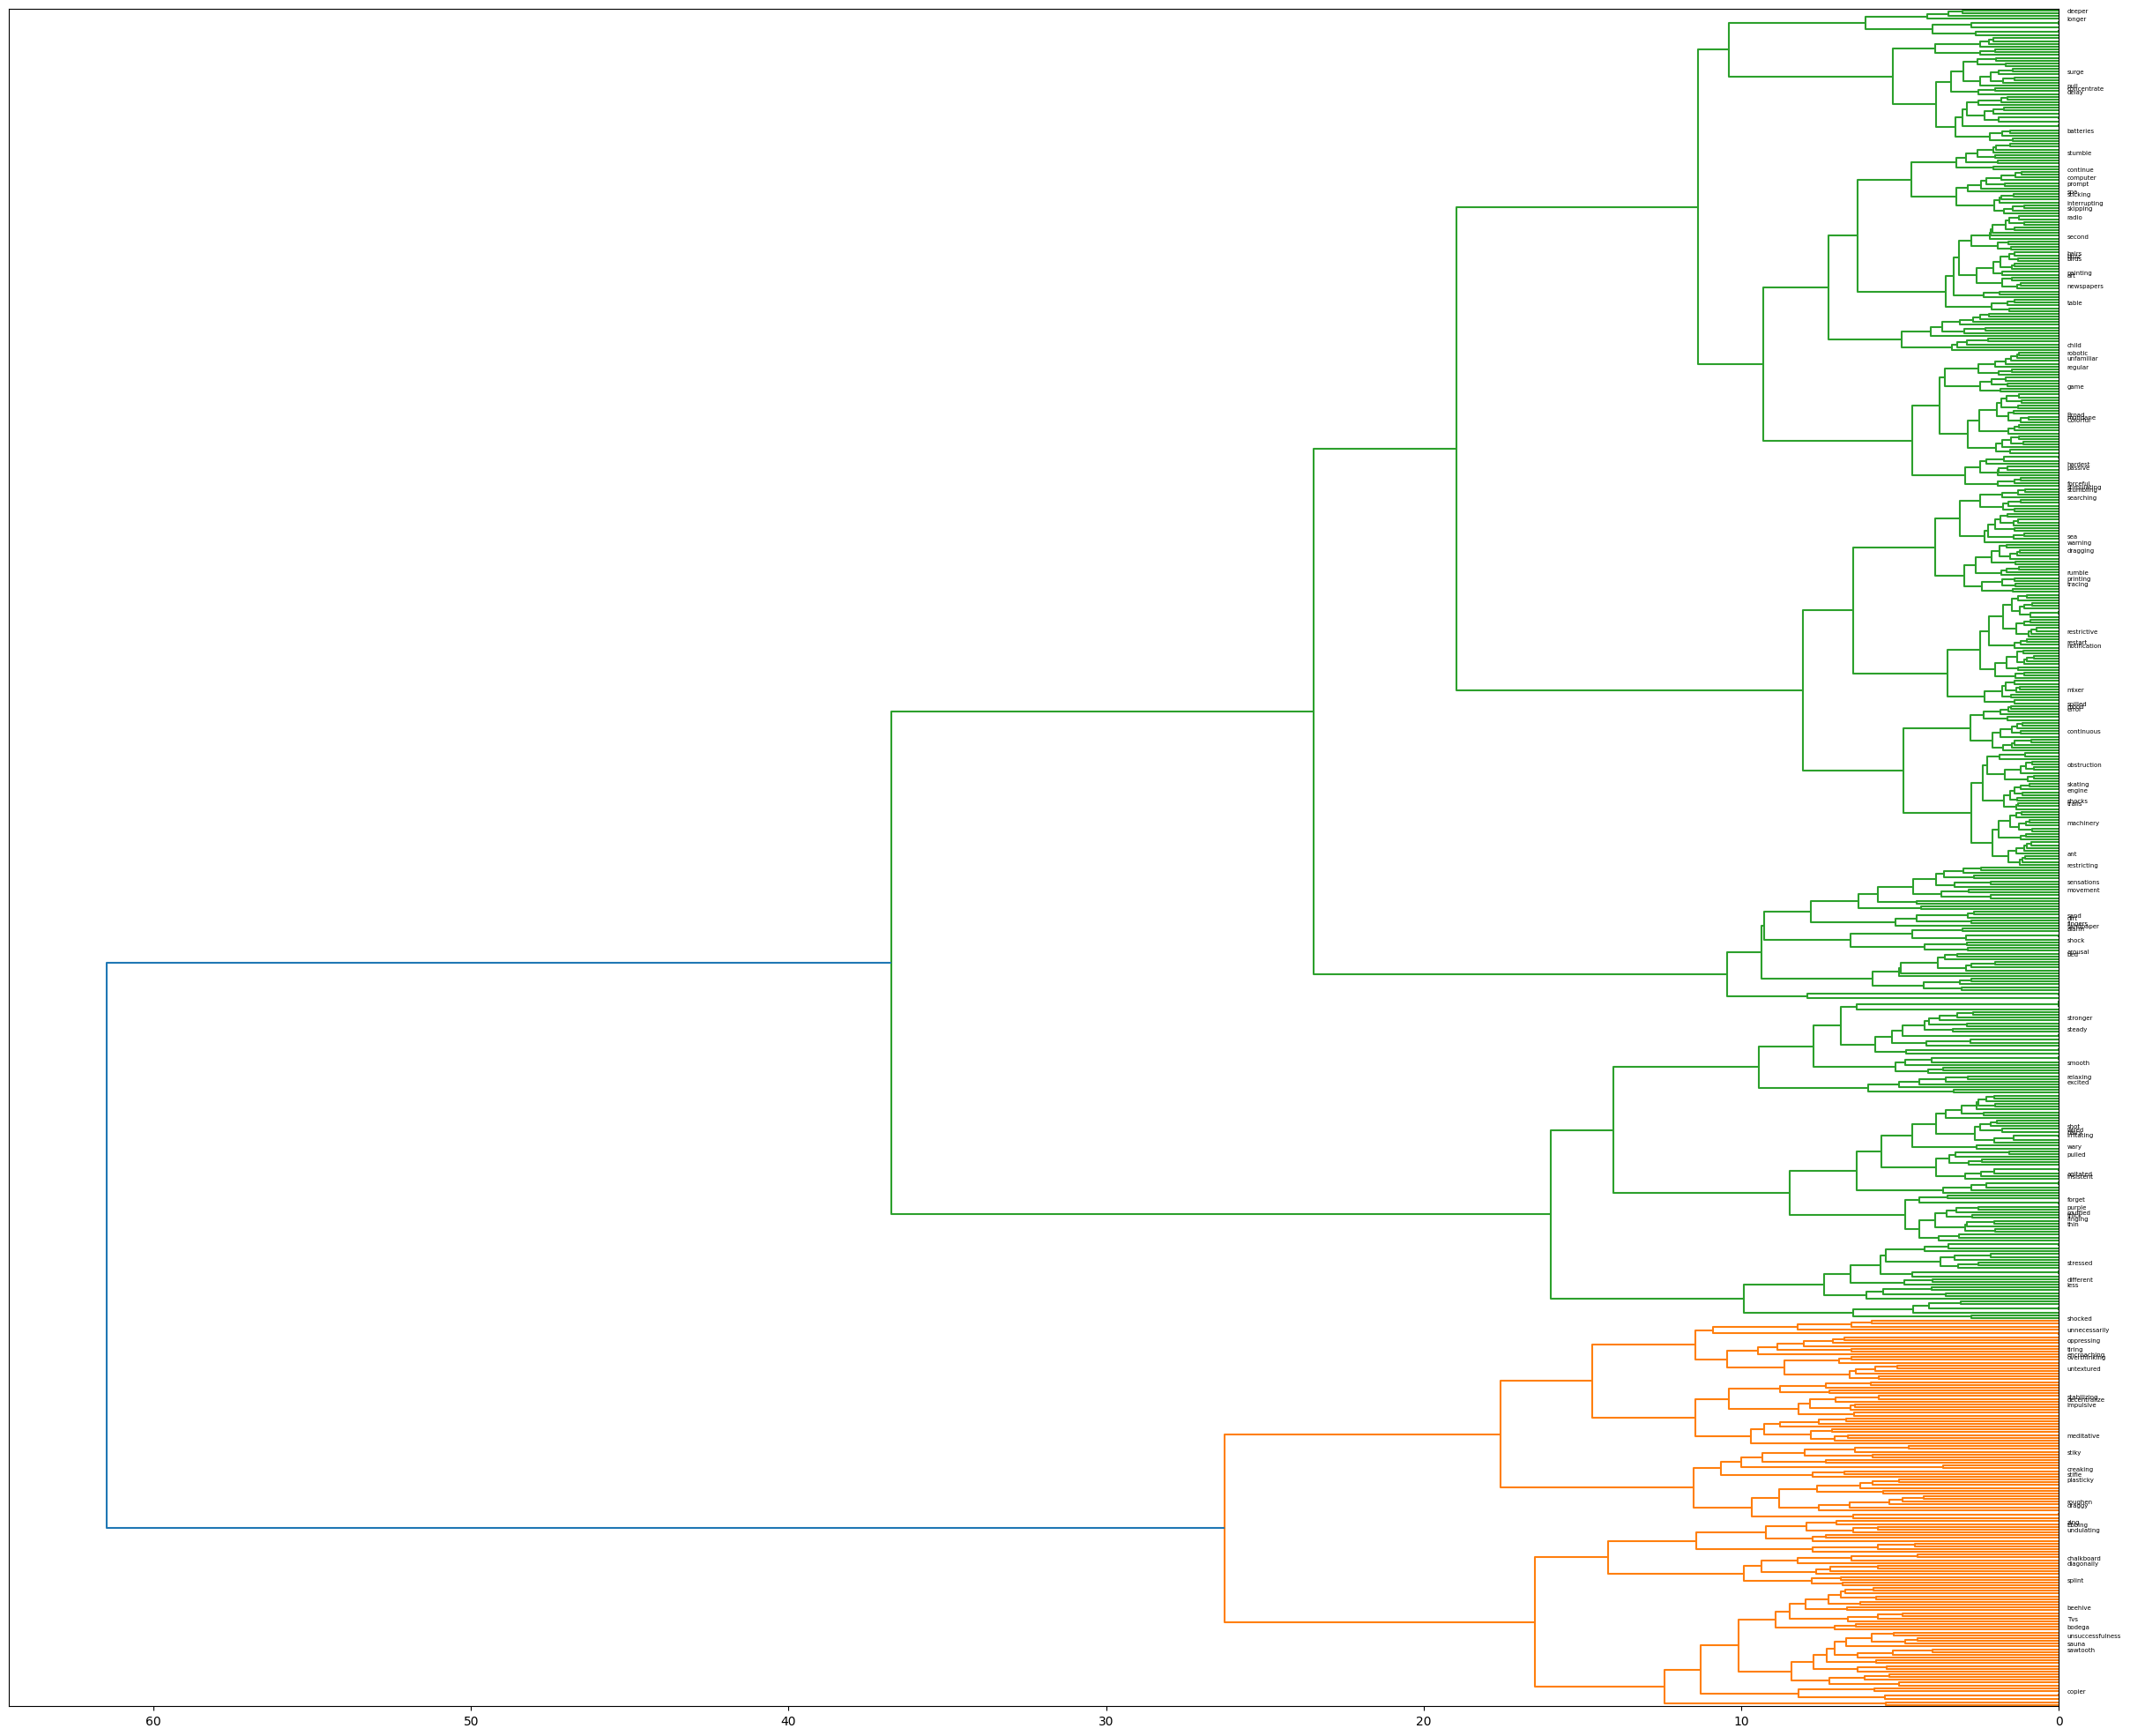

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
from nltk.corpus import wordnet

# BERT编码
def get_bert_embedding(text, model, tokenizer):
    inputs = tokenizer("I feel " + text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    relevant_tokens = outputs['last_hidden_state'][0][len(tokenizer.encode("I feel ", add_special_tokens=False)):]
    return relevant_tokens.mean(0).numpy()

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    # For situations where antonyms cannot be found
    if word.startswith('un'):
        return word[2:]
    return 'un' + word

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertModel.from_pretrained("bert-base-uncased")

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('sentiment_results2.csv')
positive_df = df[df['Final Sentiment'] == 'Neutral'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

processed_phrases = []
for phrase in phrases:
    # Ensure phrase is a string
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1])  # 获取"not"后面词的反义词
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
        else:
            processed_phrases.append(phrase)
    else:
        print(f"Skipping non-string value: {phrase}")


# Encode all tags (words and phrases) using BERT
all_embeddings1 = [get_bert_embedding(phrase, bert_model, tokenizer) for phrase in processed_phrases]

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(all_embeddings1)

linked = linkage(all_embeddings1, method='ward')
plt.figure(figsize=(30, 25))
labels = processed_phrases
subset_labels = [label if idx % 5 == 0 else '' for idx, label in enumerate(labels)]
dendrogram(linked, orientation='left', labels=subset_labels)
plt.show()


In [ ]:
#embeddings = [get_phrase_embedding(phrase, glove_embeddings) for phrase in phrases]

print(len(valid_embeddings1))
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

#Define the possible range of cluster numbers
possible_n_clusters = range(4,13)   # The minimum is 2, and the maximum is the number of samples -1

sil_scores = []

#Evaluate the number of possible clusters
for num_clusters in possible_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=num_clusters)
    preds = clusterer.fit_predict(valid_embeddings1)
    
    #Calculate the contour coefficient and save it
    score = silhouette_score(valid_embeddings1, preds)
    print(score)
    sil_scores.append(score)

#Find the number of clusters corresponding to the maximum contour coefficient value
best_num_clusters = possible_n_clusters[np.argmax(sil_scores)]
print(f"Best number of clusters: {best_num_clusters}")

67
0.05962282
0.06889627
0.07590187
0.067882806
0.07492749
0.061432816
0.06697202
0.07182894
0.07536444
Best number of clusters: 6


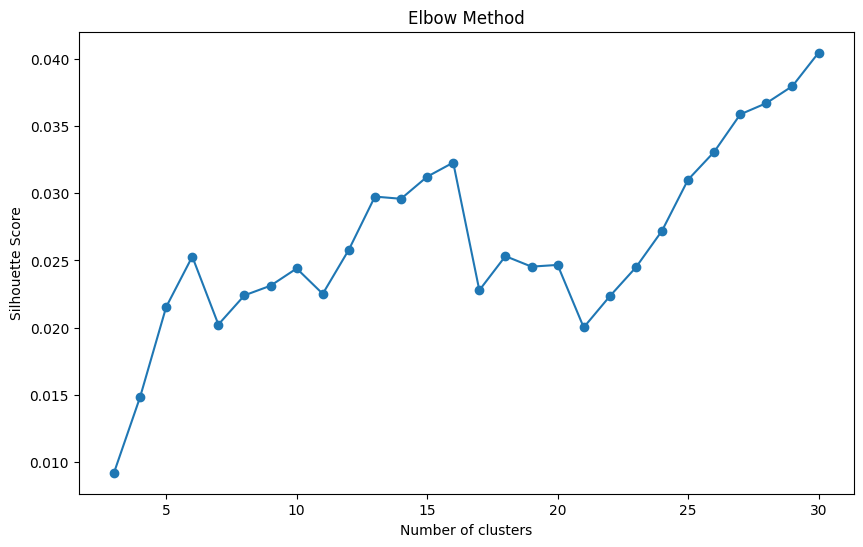

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#The list is used to save ratings for each cluster count
scores = []

#Set a range of cluster numbers, such as from 2 to 20
cluster_range = range(3,31)

#Cluster once for each number of clusters and calculate tightness or error
for n_clusters in cluster_range:
    cluster = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None).fit(valid_embeddings2)
    silhouette_avg = silhouette_score(valid_embeddings2, cluster.labels_)
    scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(cluster_range, scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=13, distance_threshold=None).fit(valid_embeddings2)

#Create a dictionary where the key is the cluster ID and the value is the list of labels in that cluster
clusters = {i: [] for i in range(cluster.n_clusters)}

for label, phrase in zip(cluster.labels_, valid_phrases2):
    clusters[label].append(phrase)


#Create a dictionary to store clustering results, and then convert it to DataFrame
cluster_dict = {}

#Create a key value pair for each cluster
for cluster_id, cluster_phrases in clusters.items():
    cluster_dict[f"Cluster_{cluster_id}"] = cluster_phrases

#Fill in the vocabulary in each cluster (for DataFrame alignment)
max_length = max(len(v) for v in cluster_dict.values())
for key, value in cluster_dict.items():
    value.extend([None] * (max_length - len(value)))

# convert to DataFrame
df_clusters = pd.DataFrame(cluster_dict)

df_clusters.to_csv("w2v4_pos_clusters.csv", index=False)


In [ ]:
## Visualization of clustering results
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering
n_clusters=5

cluster = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None).fit(valid_embeddings3) ###
labels = cluster.labels_
print(labels)

all_embeddings_np = np.vstack(valid_embeddings3) ###
print(all_embeddings_np)
tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=2500, random_state=23)
low_dim_data = tsne_model.fit_transform(all_embeddings_np)


[0 1 0 2 0 0 2 2 2 1 1 0 0 0 0 2 0 0 3 0 2 3 2 0 0 3 4 0 1 2 0 2 0 3 2 2 3
 2 0 3 3 1 0 0 1 3 0 0 2 1 2 0 3 0 0 2 1 0 0 2 0 1 2 0 2 0 2 2 2 2]
[[-0.217925   -0.24281175  0.07598633 ...  0.42395082  0.11895593
   0.10756989]
 [ 0.15521523  0.05471089 -0.42286834 ... -0.10376061  0.58870274
  -0.1904048 ]
 [-0.03064591  0.37116838 -0.35386902 ...  0.31677738  0.50067216
   0.01961074]
 ...
 [ 0.09474791  0.04002193 -0.76369977 ...  0.11788906  0.45621774
  -0.12810043]
 [ 0.02175065  0.01876712 -0.33632103 ... -0.17707282  0.29409876
   0.19704065]
 [ 0.13653126 -0.11975162 -0.35761356 ...  0.1726725   0.00396965
   0.1337853 ]]


In [ ]:
import plotly.graph_objects as go

text = []
print(valid_phrases3) ###
for phrase, label in zip(valid_phrases3, labels): ###
    text.append('words: ' + phrase + ' label: ' + str(label))

fig = go.Figure(data=[
    go.Scatter3d(
        x=low_dim_data[:, 0],
        y=low_dim_data[:, 1],
        z=low_dim_data[:, 2],
        mode='markers',
        marker=dict(size=6, color=labels),
        text=text,  # Set labels for each point
        hoverinfo='text'  # When hovering over a point, only display text content
    )
])

fig.update_layout(title="3D t-SNE Visualization with Words", width=800, height=600)
fig.show()


['importance', 'groovy', 'discreet', 'unnerving', 'happy', 'safe', 'intense', 'unangry', 'alive', 'sparkly', 'cuddly', 'aware', 'friendly', 'nonslippery', 'very', 'flattery', 'comfortable', 'posh', 'sharpness', 'easily', 'unstressful', 'pleasantness', 'milder', 'satisfied', 'grand', 'pleasant', 'be_well', 'glad', 'cute', 'pushy', 'okay', 'unannoyed', 'easy', 'pleasing', 'astounded', 'vigilant', 'coolness', 'undistressing', 'really', 'gentle', 'hotness', 'euphoric', 'complexity', 'kind', 'wispy', 'warmth', 'important', 'affirmative', 'undisruptive', 'playful', 'excitable', 'good', 'soothing', 'recommend', 'positive', 'hedonistic', 'peppy', 'wonder', 'nice', 'attentive', 'success', 'melodic', 'empathetic', 'better', 'unanxious', 'interesting', 'benign', 'gripping', 'pronounced', 'haphazard']


In [9]:
### 计算每一个信号pos neg neu的单词的比例（单个单词）
import pandas as pd


df = pd.read_csv('processed_uncase_sentiment_results3.csv')

# Calculate the promotion of each Final Sentiment for each Signal category
result = df.groupby('Signal')['Final Sentiment'].value_counts(normalize=True).unstack().fillna(0)


result_percentage = result * 100


print(result_percentage)


Final Sentiment   Negative   Positive
Signal                               
1                47.619048  52.380952
2                61.538462  38.461538
3                40.000000  60.000000
4                58.333333  41.666667
5                33.333333  66.666667
6                68.750000  31.250000
7                63.636364  36.363636
8                78.571429  21.428571
9                25.000000  75.000000
10                8.333333  91.666667
11               71.428571  28.571429
12               68.750000  31.250000
13               47.058824  52.941176
14               33.333333  66.666667
15               41.176471  58.823529
16               40.000000  60.000000
17               80.000000  20.000000
18               83.333333  16.666667
19               60.000000  40.000000
20               40.000000  60.000000
21               44.444444  55.555556
22               69.230769  30.769231
23               45.454545  54.545455
24               58.823529  41.176471
25          

In [ ]:
##Part of speech conversion, comparative level, superlative level
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def lemmatize_word(word):
    #Obtain part of speech
    pos_tag_tuple = nltk.pos_tag([word])[0]  # 注意[word]这里将单词转化为了一个单元素列表
    pos_tag = pos_tag_tuple[1]
    
    #If it is comparative or superlative
    if pos_tag in ['JJR','JJS','RBR','RBS','JJ','VBG']:
        return lemmatizer.lemmatize(word, pos='a')
    
    
    #If it is a different part of speech, try converting it to an adjective
    return to_adjective(word)

def to_adjective(word):
    #Attempt to find adjectives related to the morphology of the word
    synsets = wn.synsets(word)
    
    for syn in synsets:
        for lemma in syn.lemmas():
            related_forms = lemma.derivationally_related_forms()

            #In order to save words related to's', if we cannot find words related to 'a'
            adj_related_form = None
            
            for related_form in related_forms:
                #If a word related to 'a' is found, return immediately
                if related_form.synset().pos() == 'a':
                    return related_form.name().replace('_', ' ')
                elif related_form.synset().pos() == 's':
                    adj_related_form = related_form

            # #If we still have a word related to's' after the loop ends, return it
            if adj_related_form:
                return adj_related_form.name().replace('_', ' ')
    
    # #If neither the word related to's' nor the word related to 'a' is found, return the original word
    return word

df = pd.read_csv('sentiment_results5.csv')

positive_rows = df[df['Final Sentiment'] == 'Positive'].copy()
negative_rows = df[df['Final Sentiment'] == 'Negative'].copy()

positive_rows['filtered_words'] = positive_rows['filtered_words'].apply(lemmatize_word)
negative_rows['filtered_words'] = negative_rows['filtered_words'].apply(lemmatize_word)

columns_order = ['Participants', 'Signal', 'filtered_words', 'Final Sentiment']
positive_rows = positive_rows[columns_order]
negative_rows = negative_rows[columns_order]

positive_rows.to_csv('processed_sentiment_results4.csv',index=False)
negative_rows.to_csv('processed_sentiment_results4.csv',mode='a',index=False)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhaozirui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaozirui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/zhaozirui/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
word='hotness'
synsets = wn.synsets(word)
for syn in synsets:
    for lemma in syn.lemmas():
        related_forms = lemma.derivationally_related_forms()
        for related_form in related_forms:
            if related_form.synset().pos() == 'a':
                print(related_form.name().replace('_', ' '))
            else :
                print("NONE")

hot
NONE
NONE
NONE
NONE
NONE
NONE


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

nltk.download('averaged_perceptron_tagger')

words = 'coldness'
tagged = pos_tag(word_tokenize(words))
#print(tagged)

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize(words, pos='a'))




coldness


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhaozirui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


not vigorous-->not vigorous
not electric-->not electric
not obvious-->unobvious
not communication-->not communication
not familiar-->unfamiliar
not benign-->malignant
not satisfied-->fall_short_of
not trust-->distrust
not excited-->stifle
not good-->evil
not velvety-->not velvety
not pleasant-->unpleasant
Missing words: frustrative in phrase: 'frustrative'
Missing words: fall_short_of in phrase: 'fall_short_of'


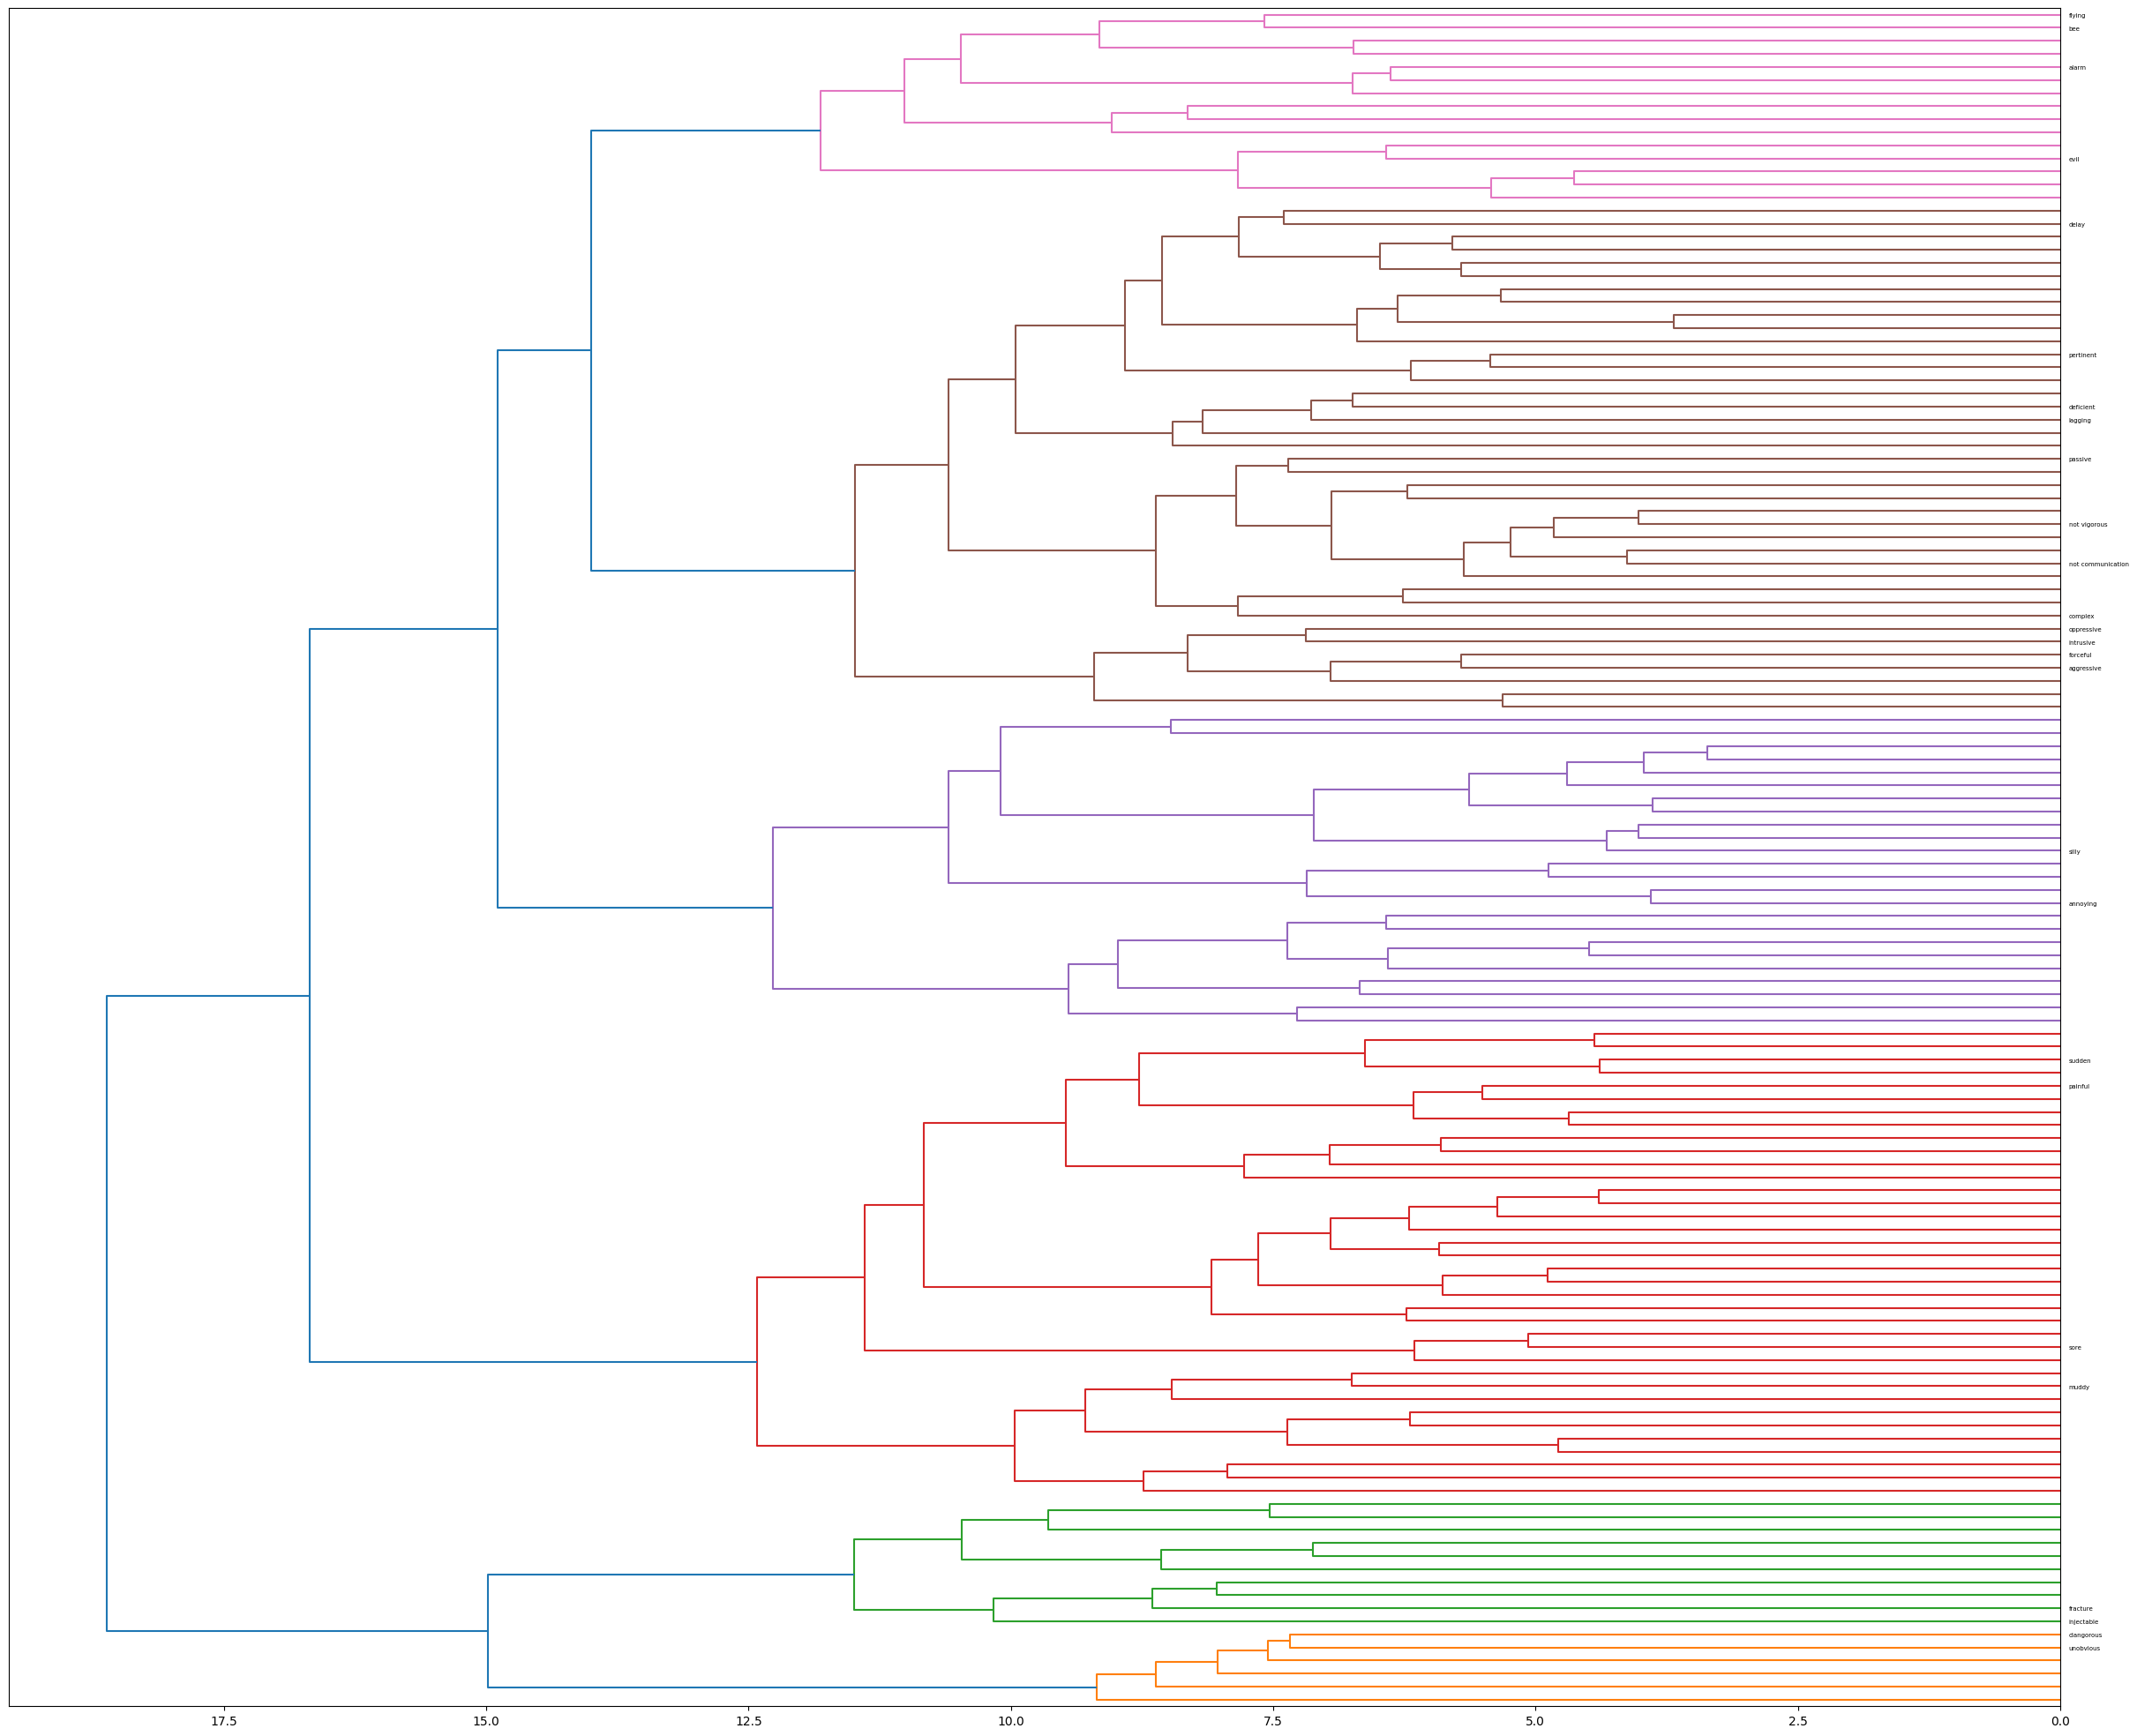

In [ ]:
## Method1:GloVe improvement 2
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet

def load_glove(path):
    embeddings = {}
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = ''.join(values[:-300])
            vector = np.asarray(values[-300:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings = load_glove('/Users/zhaozirui/Downloads/glove.840B.300d.txt')

def get_phrase_embedding(phrase, embeddings):
    words = phrase.split()
    vectors = []
    missing_words = []
    for word in words:
        emb = embeddings.get(word)
        if emb is not None:
            vectors.append(emb)
        else:
            missing_words.append(word)
    if missing_words:
        print(f"Missing words: {', '.join(missing_words)} in phrase: '{phrase}'")
        return None
    return np.mean(vectors, axis=0)

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'not ' + word

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_sentiment_results4.csv')
positive_df = df[df['Final Sentiment'] == 'Negative'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings1 = []
valid_phrases1 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []

# Create a mapping from the original phrase to its antonym or processed phrase
phrase_to_antonym_mapping = {}

for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1]) 
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
            phrase_to_antonym_mapping[phrase] = antonym     
        else:
            processed_phrases.append(phrase)
            phrase_to_antonym_mapping[phrase] = phrase
    else:
        print(f"Skipping non-string value: {phrase}")    
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:
    
    embedding = get_phrase_embedding(phrase, glove_embeddings)
    if embedding is not None:
        valid_embeddings1.append(embedding)
        valid_phrases1.append(phrase)
    else:
        missing_phrases.append(phrase)

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings1)

linked = linkage(valid_embeddings1, method='ward')

plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases1)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()

not vigorous-->not vigorous
not electric-->not electric
not obvious-->unobvious
not communication-->not communication
not familiar-->unfamiliar
not benign-->malignant
not satisfied-->fall_short_of
not trust-->distrust
not excited-->stifle
not good-->evil
not velvety-->not velvety
not pleasant-->unpleasant
Missing words: frustrative in phrase: 'frustrative'
Missing words: agitative in phrase: 'agitative'
Missing words: fall_short_of in phrase: 'fall_short_of'


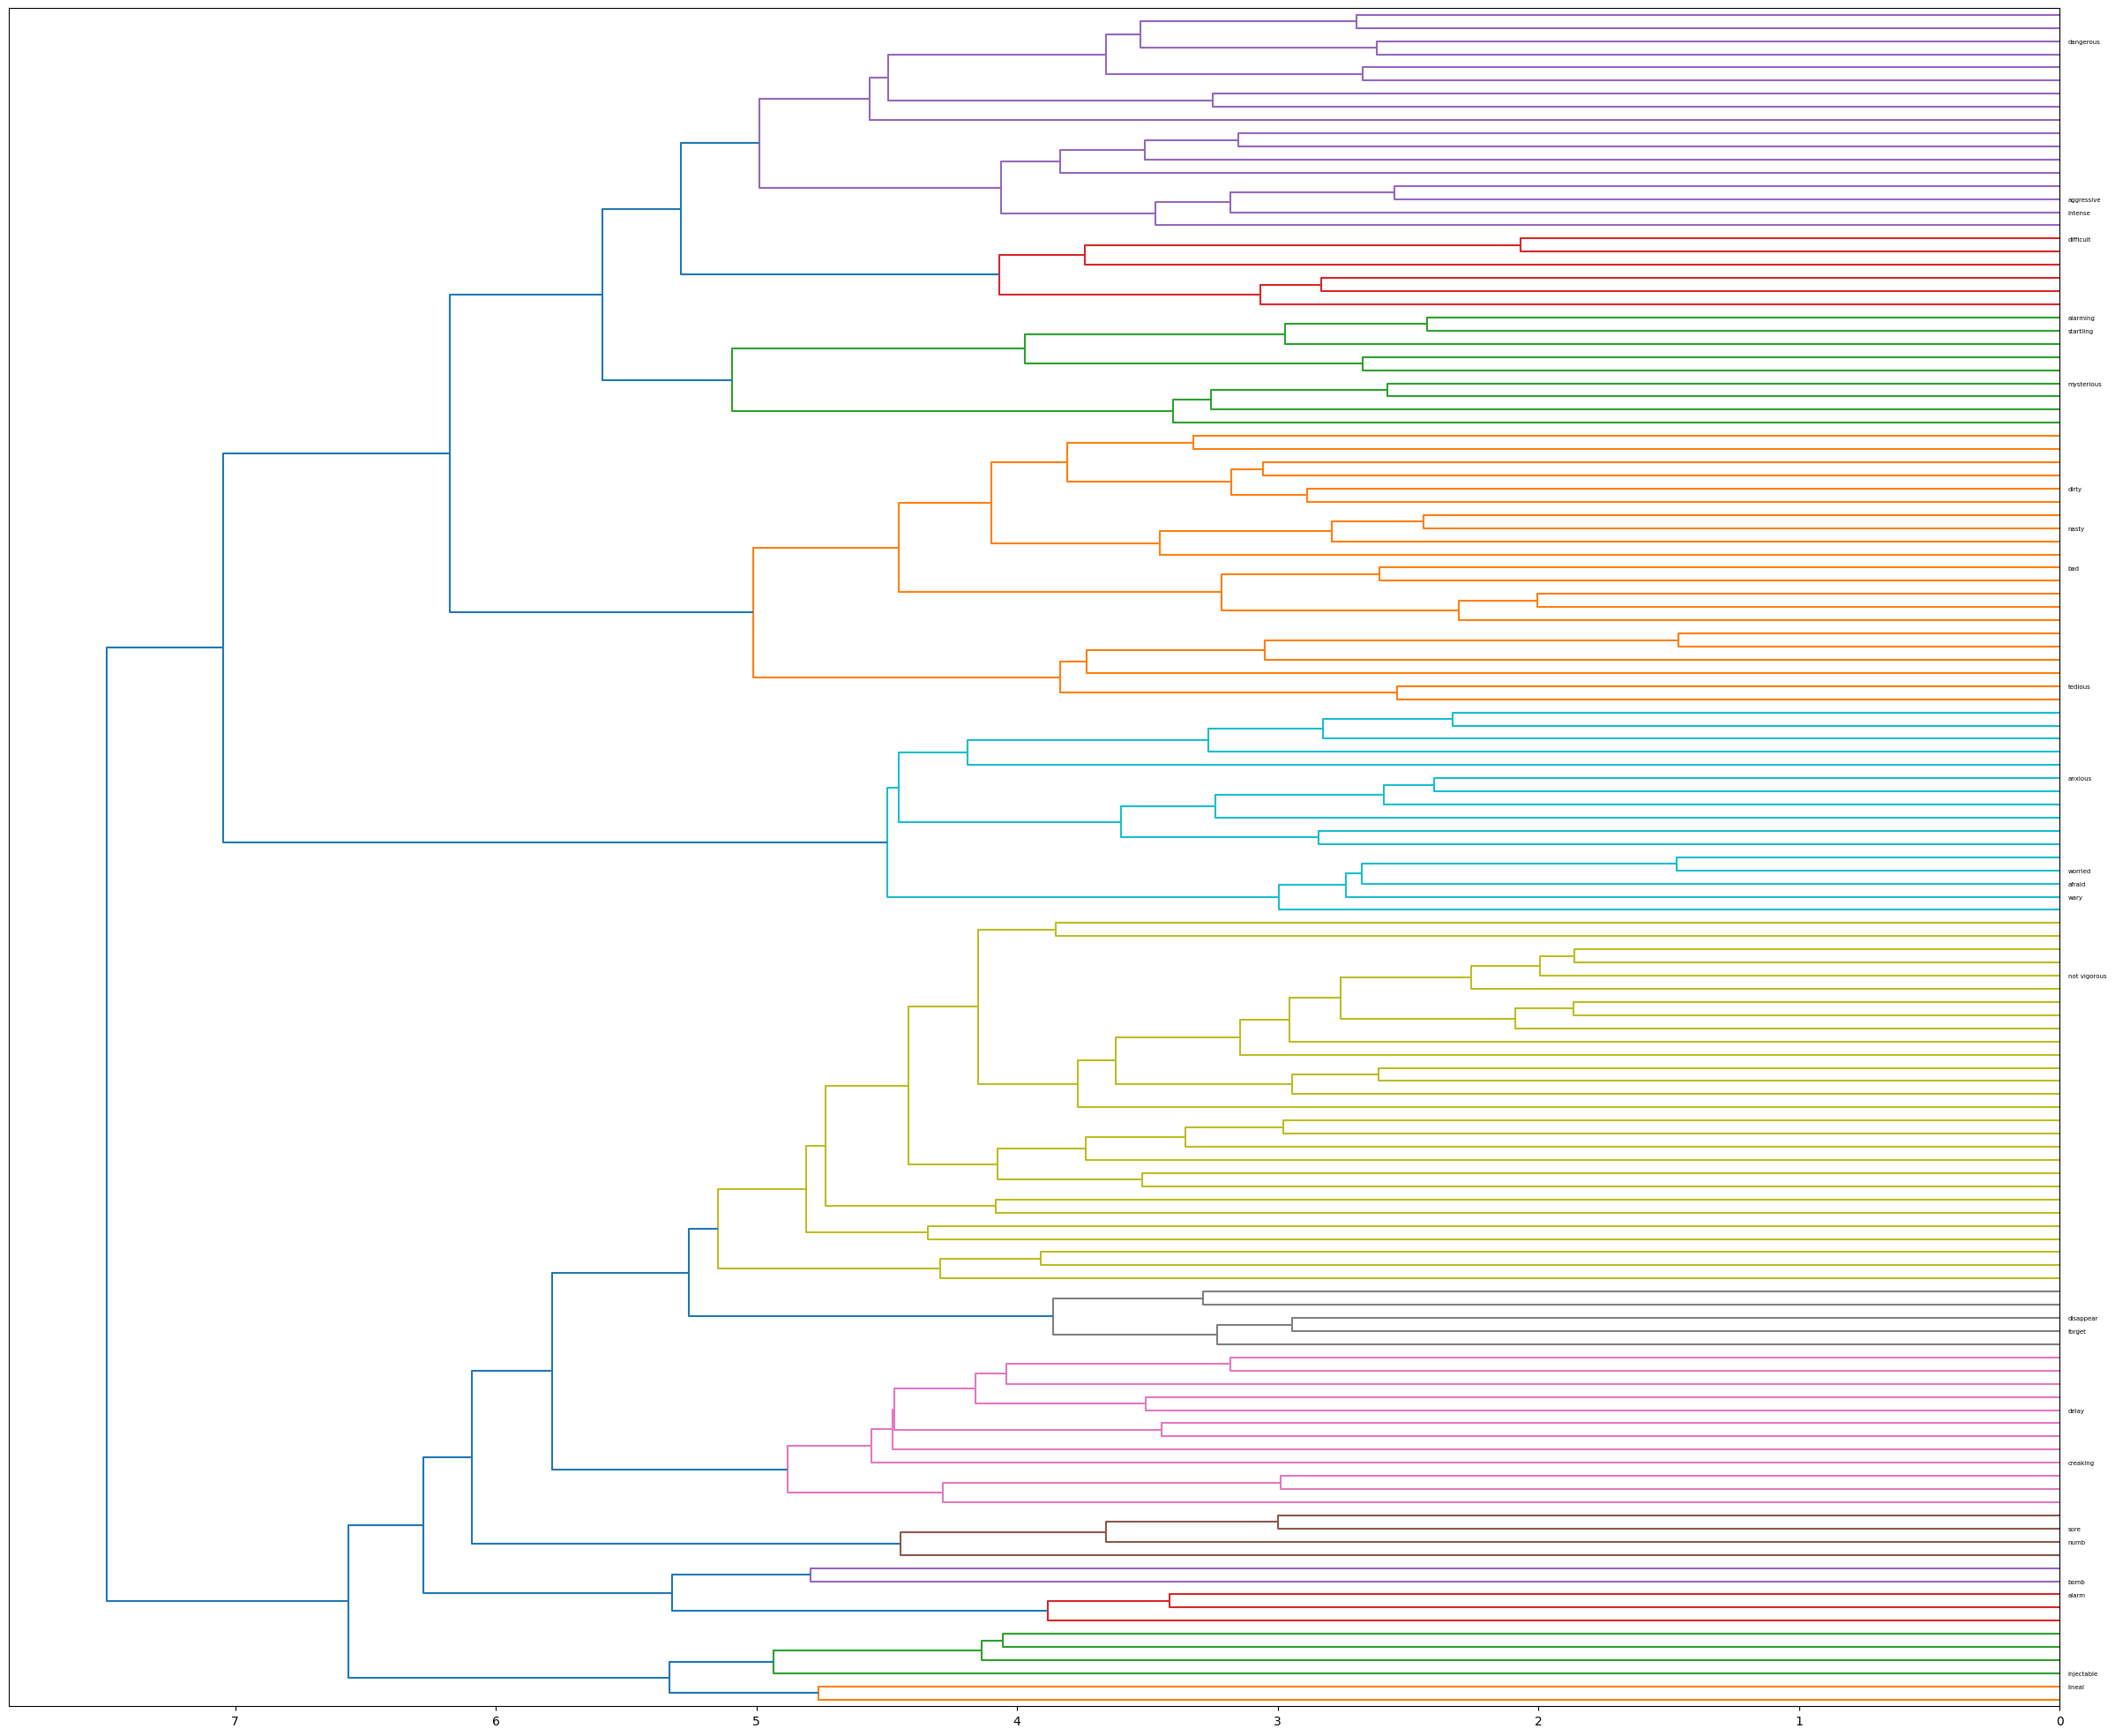

In [ ]:
## word2vec 2
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from gensim.models import KeyedVectors


def load_word2vec(path):
    return KeyedVectors.load_word2vec_format(path, binary=True)


word2vec_embeddings = load_word2vec('/Users/zhaozirui/Downloads/GoogleNews-vectors-negative300.bin')


def get_phrase_embedding(phrase, embeddings):
    words = phrase.split()
    vectors = []
    missing_words = []
    for word in words:
        try:
            emb = embeddings[word]
            vectors.append(emb)
        except KeyError:
            missing_words.append(word)
    if missing_words:
        print(f"Missing words: {', '.join(missing_words)} in phrase: '{phrase}'")
        return None
    return np.mean(vectors, axis=0)

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'not ' + word

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_sentiment_results4.csv')
positive_df = df[df['Final Sentiment'] == 'Negative'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings2 = []
valid_phrases2 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []
for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1]) 
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
        else:
            processed_phrases.append(phrase)
    else:
        print(f"Skipping non-string value: {phrase}")
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:

    embedding = get_phrase_embedding(phrase, word2vec_embeddings)
    if embedding is not None:
        valid_embeddings2.append(embedding)
        valid_phrases2.append(phrase)
    else:
        missing_phrases.append(phrase)
        

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings2)

linked = linkage(valid_embeddings2, method='ward')

plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases2)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()


not vigorous-->not vigorous
not electric-->not electric
not obvious-->unobvious
not communication-->not communication
not familiar-->unfamiliar
not benign-->malignant
not satisfied-->fall_short_of
not trust-->distrust
not excited-->stifle
not good-->evil
not velvety-->not velvety
not pleasant-->unpleasant


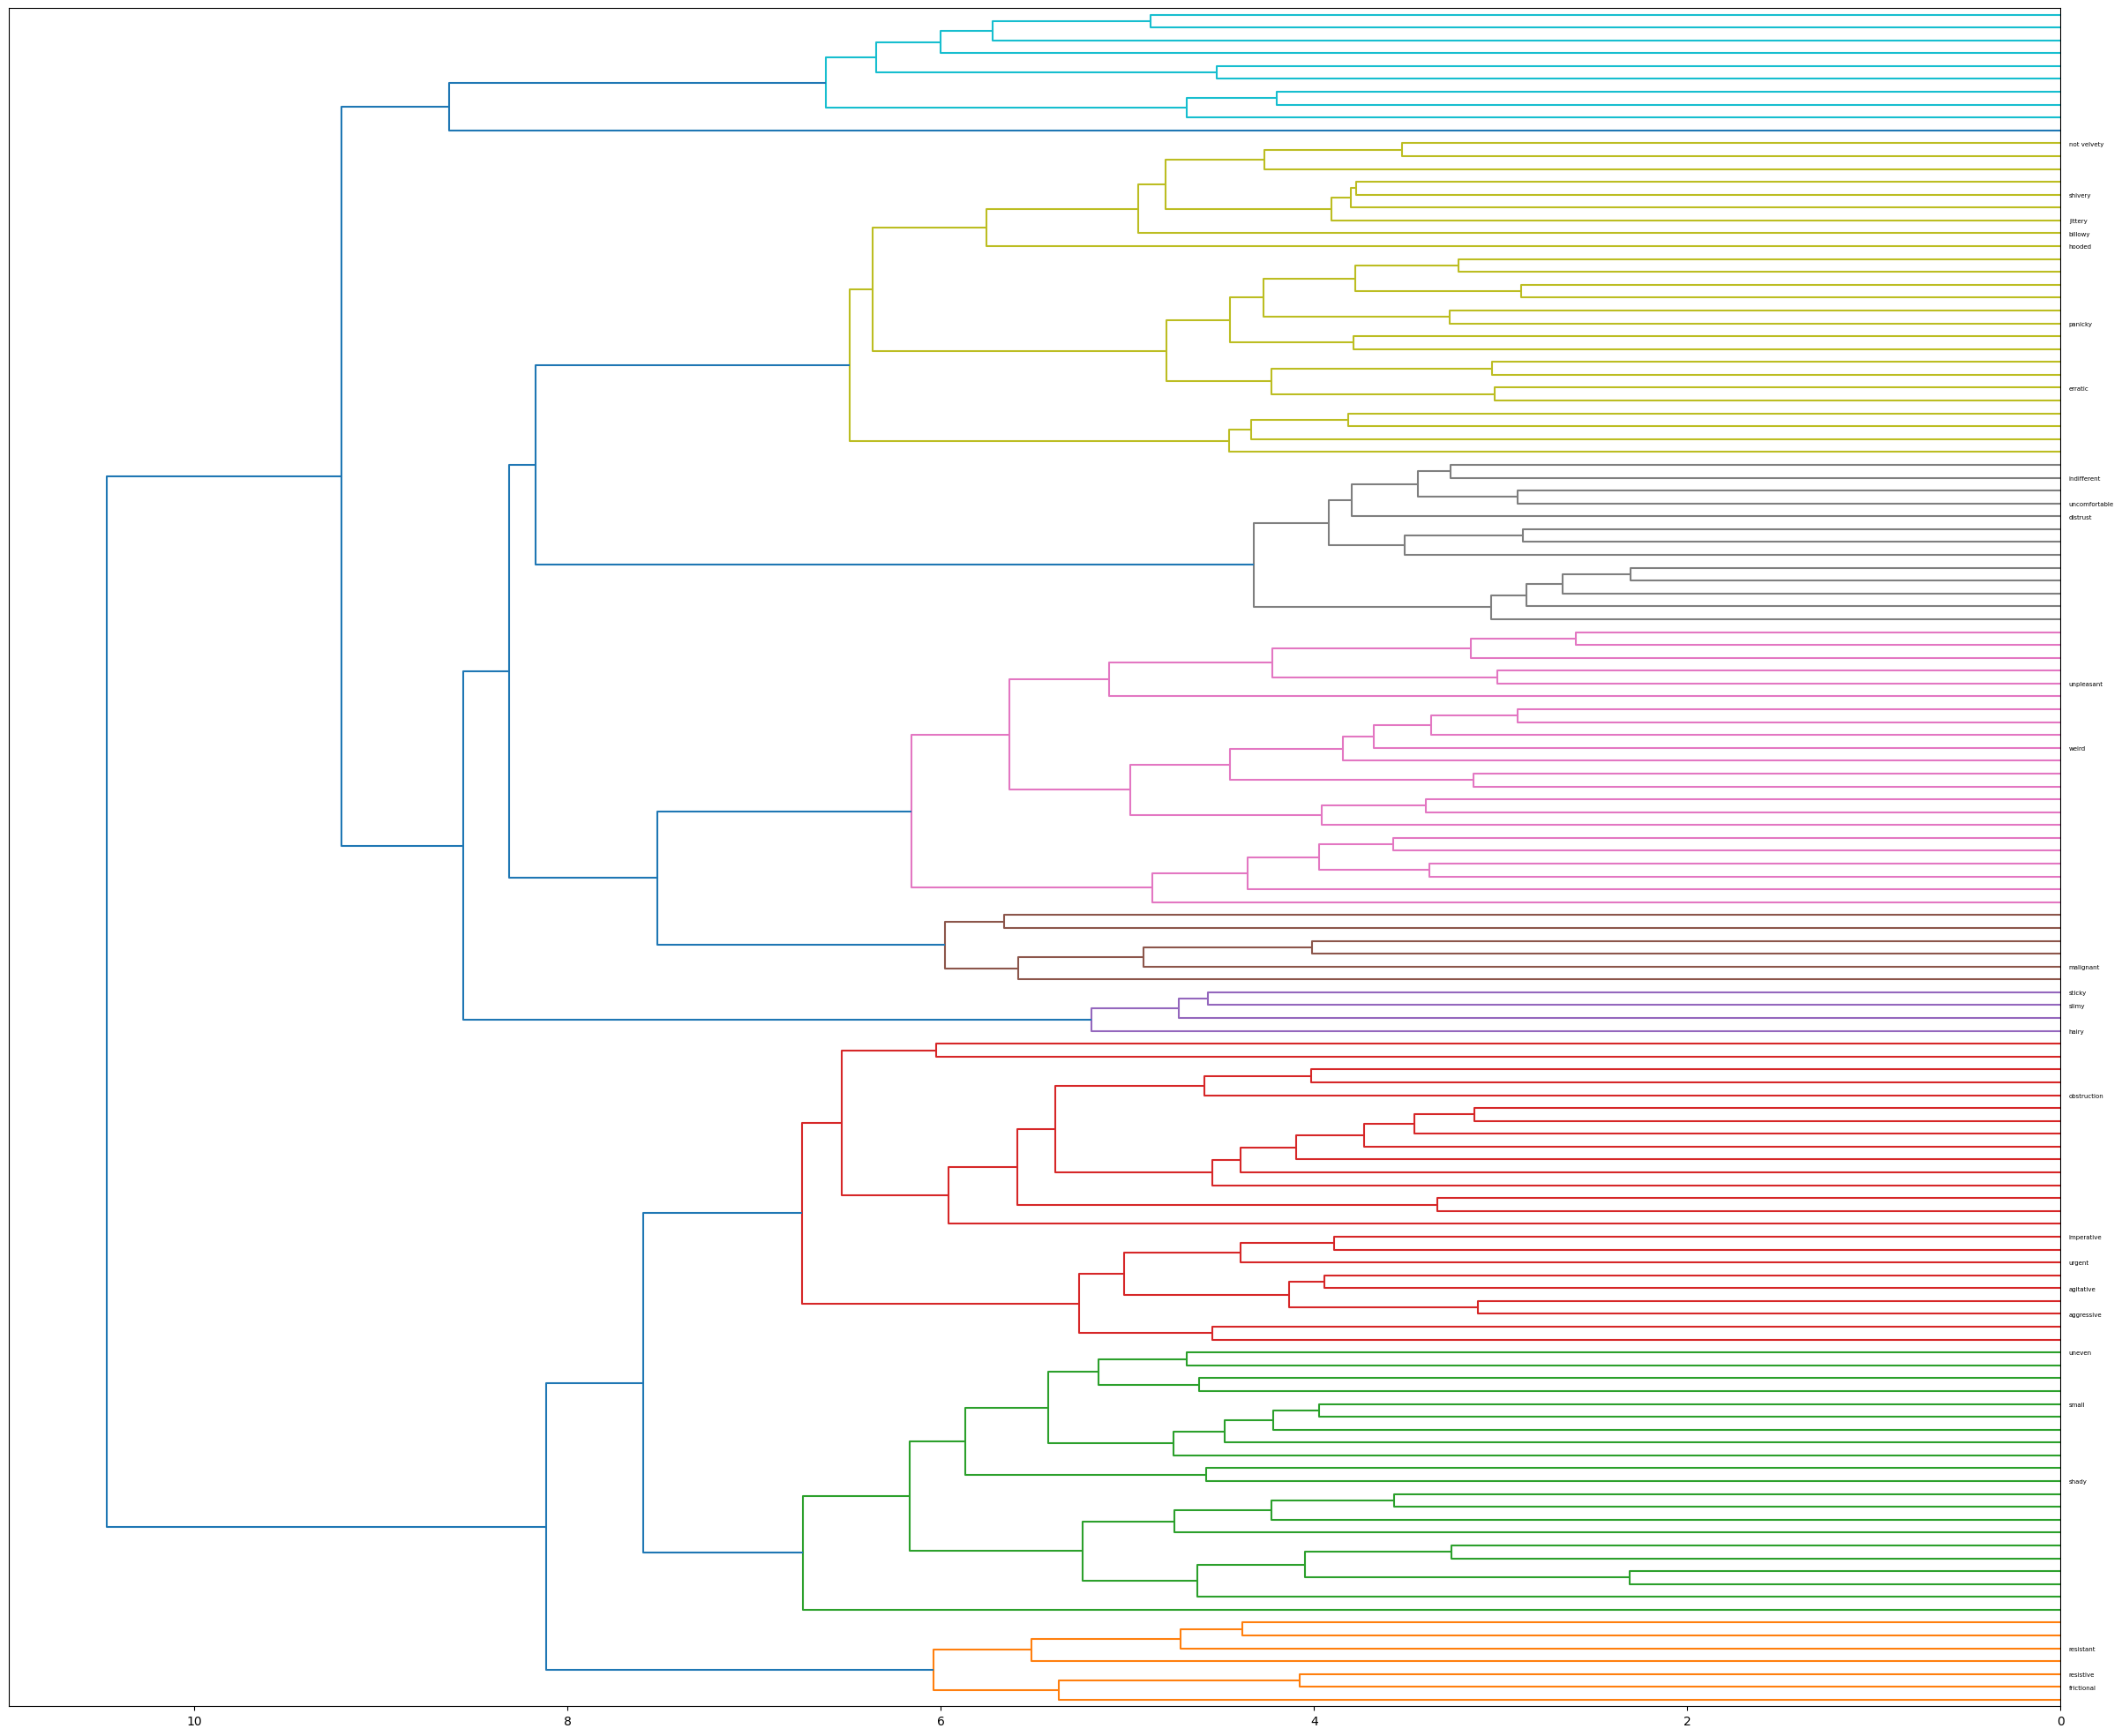

In [ ]:
## FastText 2
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
import fasttext

# Use the pre-trained FastText model instead of your GloVe path
fasttext_model = fasttext.load_model('/Users/zhaozirui/Downloads/wiki.en/wiki.en.bin')

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'not ' + word  ###

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_sentiment_results4.csv')
positive_df = df[df['Final Sentiment'] == 'Negative'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings3 = []
valid_phrases3 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []

# Create a mapping from the original phrase to its antonym or processed phrase
phrase_to_antonym_mapping = {}

for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1])  
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
            phrase_to_antonym_mapping[phrase] = antonym 
        else:
            processed_phrases.append(phrase)
            phrase_to_antonym_mapping[phrase] = phrase 
    else:
        print(f"Skipping non-string value: {phrase}")
        

df = pd.read_csv('processed_sentiment_results4.csv')

# Filtered_ Replace the values in the words column with antonyms or processed phrases
df['filtered_words'] = df['filtered_words'].str.lower().map(phrase_to_antonym_mapping).fillna(df['filtered_words'])

df.to_csv('processed_with_pos_antonyms3.csv', index=False)   
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:
    # Process phrase embeddings using fasttext_model
    embedding = fasttext_model.get_word_vector(phrase)
    if embedding is not None:
        valid_embeddings3.append(embedding)
        valid_phrases3.append(phrase)
    else:
        missing_phrases.append(phrase)
        

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=5).fit(valid_embeddings3)

linked = linkage(valid_embeddings3, method='ward')


plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases3)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()


not pleasant-->unpleasant
not excited-->stifle
not interested-->bore
not feeling-->not feeling
not vigorous-->not vigorous
not velvety-->not velvety
not benign-->malignant
not familiar-->unfamiliar
not satisfied-->fall_short_of
not obvious-->unobvious
not good-->evil
not intense-->mild
not electric-->not electric


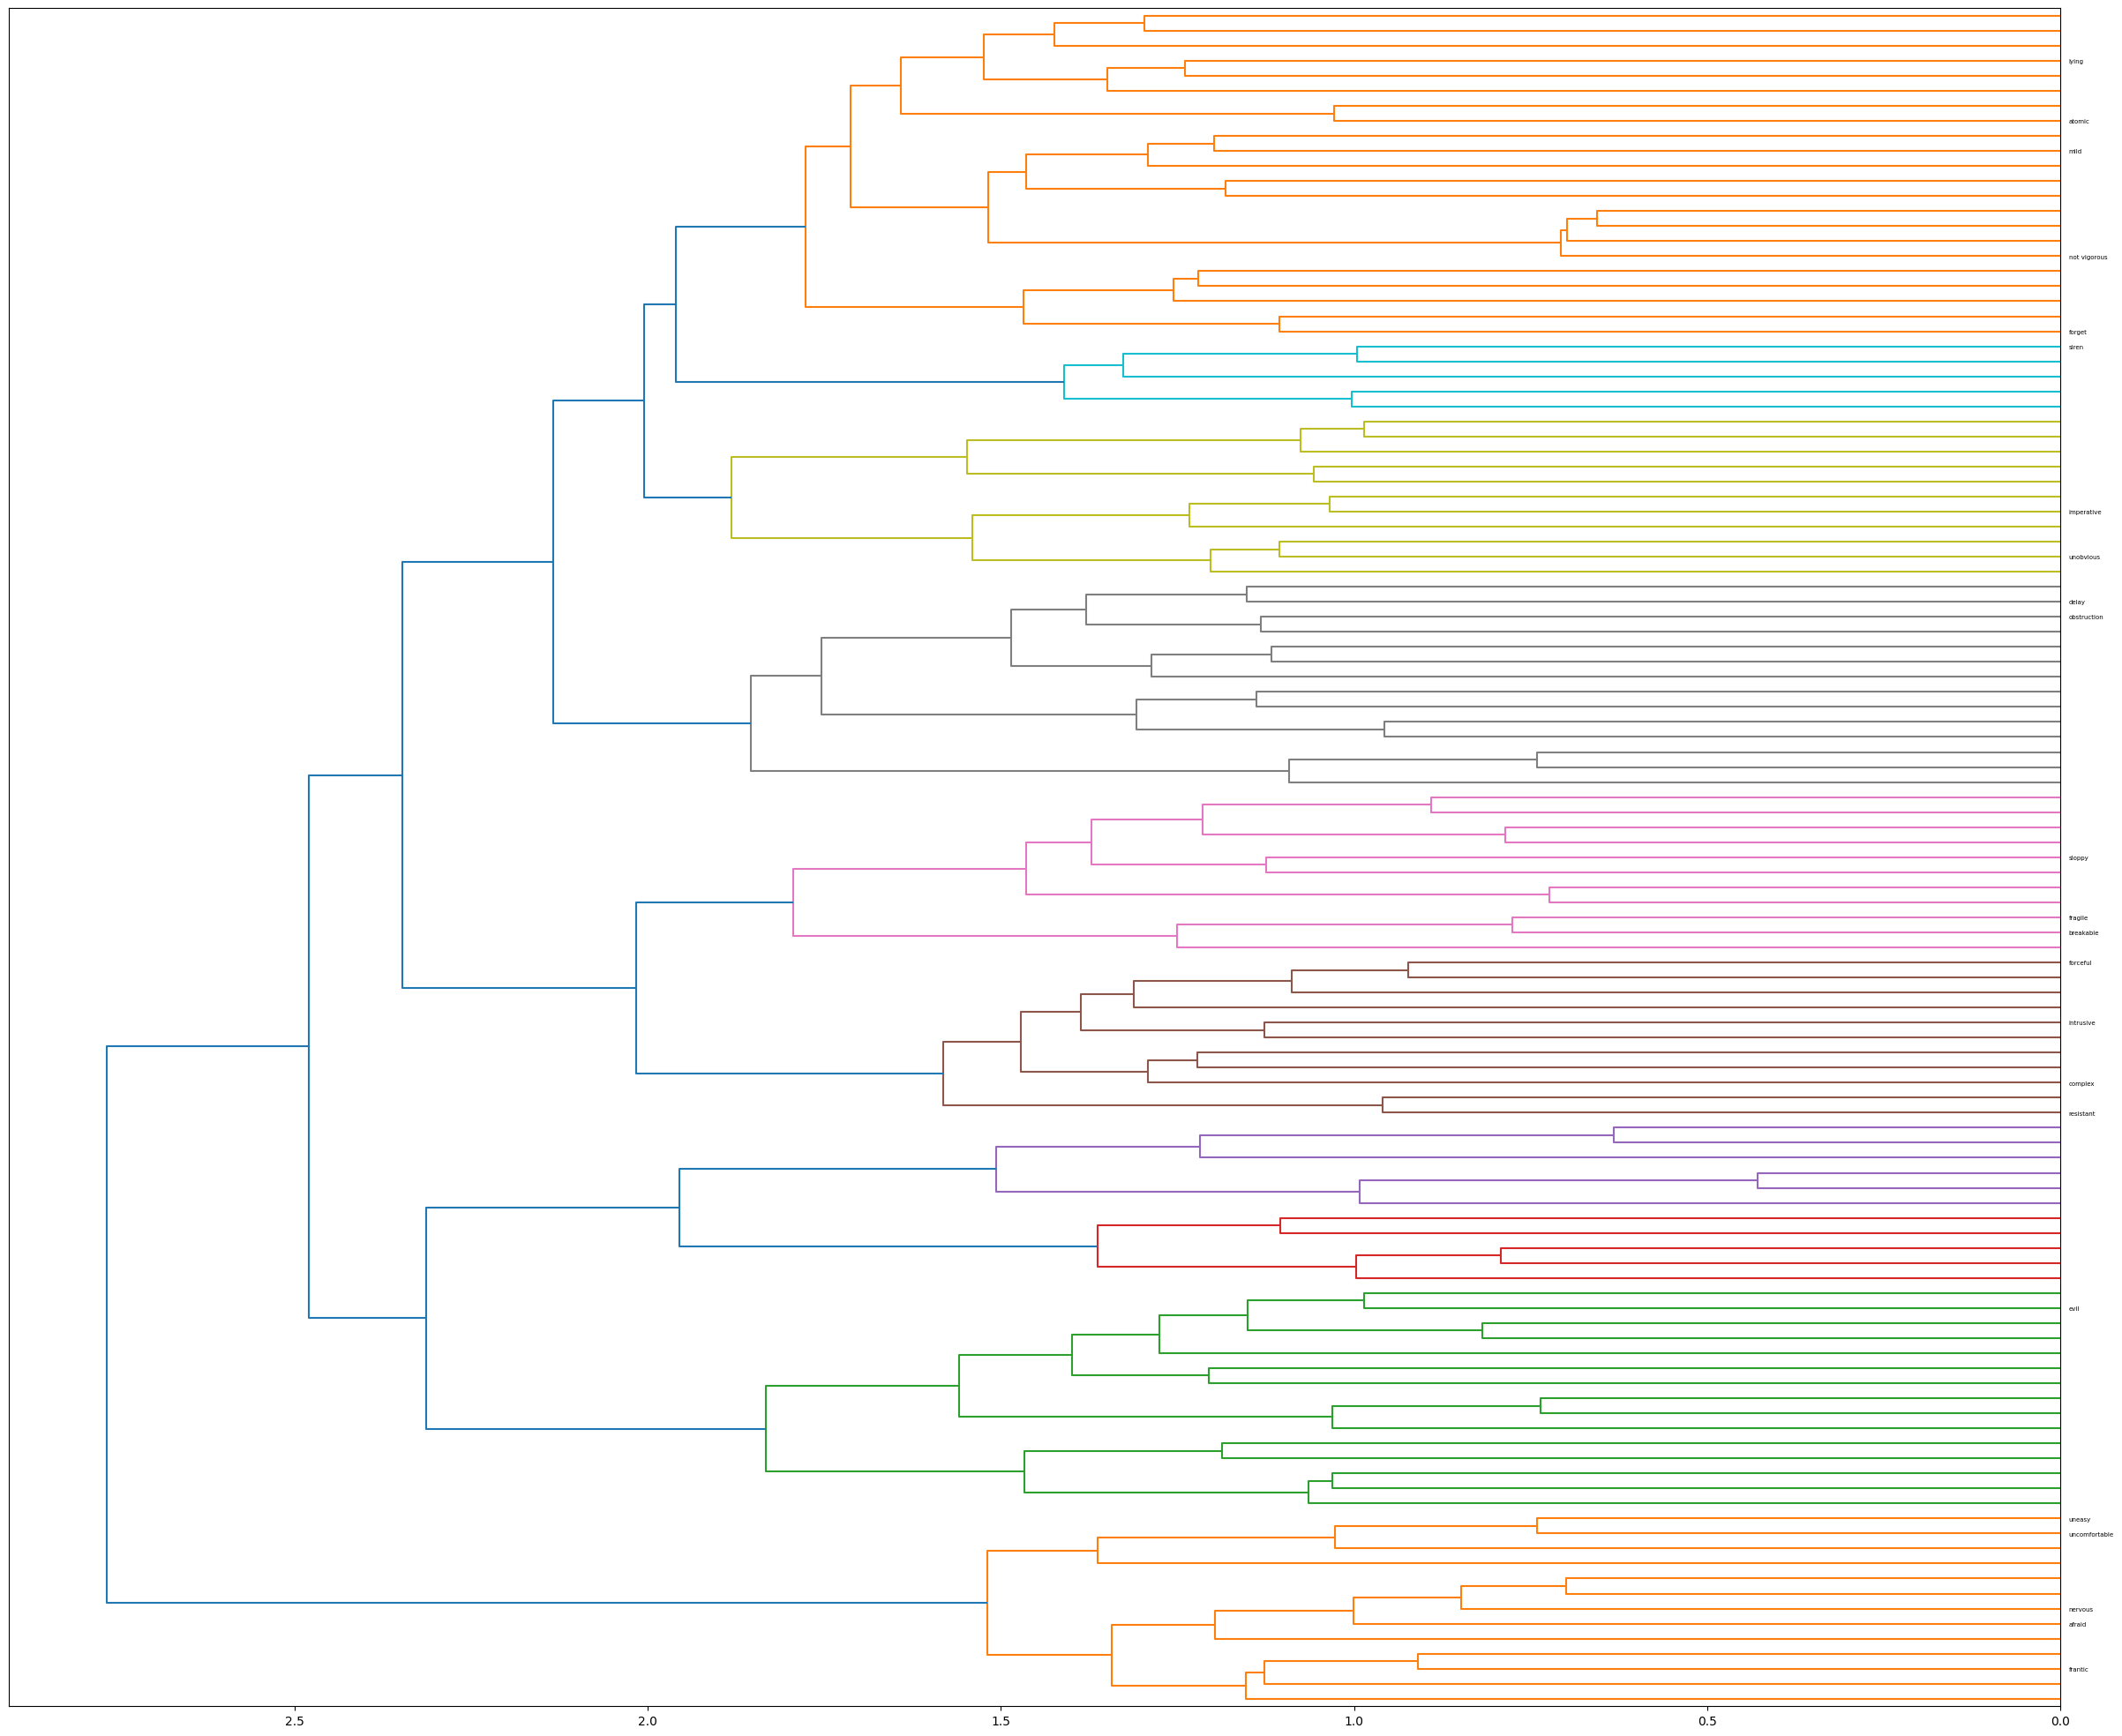

In [8]:
## ConceptNet Numberbatch
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
## ConceptNet Numberbatch
from gensim.models import KeyedVectors


numberbatch_path = '/Users/zhaozirui/Desktop/ASU-visiting student/11.9/numberbatch-en-19.08.txt'

numberbatch = KeyedVectors.load_word2vec_format(numberbatch_path, binary=False)

def get_phrase_embedding(phrase, embeddings):
    words = phrase.split()
    vectors = []
    missing_words = []
    for word in words:
        try:
            emb = embeddings[word]
            vectors.append(emb)
        except KeyError:
            missing_words.append(word)
    if missing_words:
        print(f"Missing words: {', '.join(missing_words)} in phrase: '{phrase}'")
        return None
    return np.mean(vectors, axis=0)

def get_antonym(word):
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                return lemma.antonyms()[0].name()
    return 'not ' + word

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_sentiment_results3.csv')
positive_df = df[df['Final Sentiment'] == 'Negative'] ###
phrases = positive_df['filtered_words'].tolist()
# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings4 = []
valid_phrases4 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []
for phrase in phrases:
    # Ensure phrase is a string
    phrase=phrase.lower()
    if isinstance(phrase, str):
        if phrase.startswith("not "):
            antonym = get_antonym(phrase.split(" ")[1]) 
            print(phrase + "-->" + antonym)
            processed_phrases.append(antonym)
        else:
            processed_phrases.append(phrase)
    else:
        print(f"Skipping non-string value: {phrase}")
        
processed_phrases = list(set(processed_phrases))

for phrase in processed_phrases:

    embedding = get_phrase_embedding(phrase, numberbatch)
    if embedding is not None:
        valid_embeddings4.append(embedding)
        valid_phrases4.append(phrase)
    else:
        missing_phrases.append(phrase)
        

cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings4)

linked = linkage(valid_embeddings4, method='ward')

plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases4)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()

In [ ]:
## process phrases
import pandas as pd


df = pd.read_csv("phrase_fine_tune_res.csv")

new_rows = []

for index, row in df.iterrows():
   
    phrases = row['phrases'].split(',')
    for phrase in phrases:
        new_rows.append([row['Participants'], row['Signal'], phrase.strip()])


new_df = pd.DataFrame(new_rows, columns=['Participants', 'Signal', 'phrases'])

new_df.to_csv("processed_phrase_fine_tune_res.csv", index=False)

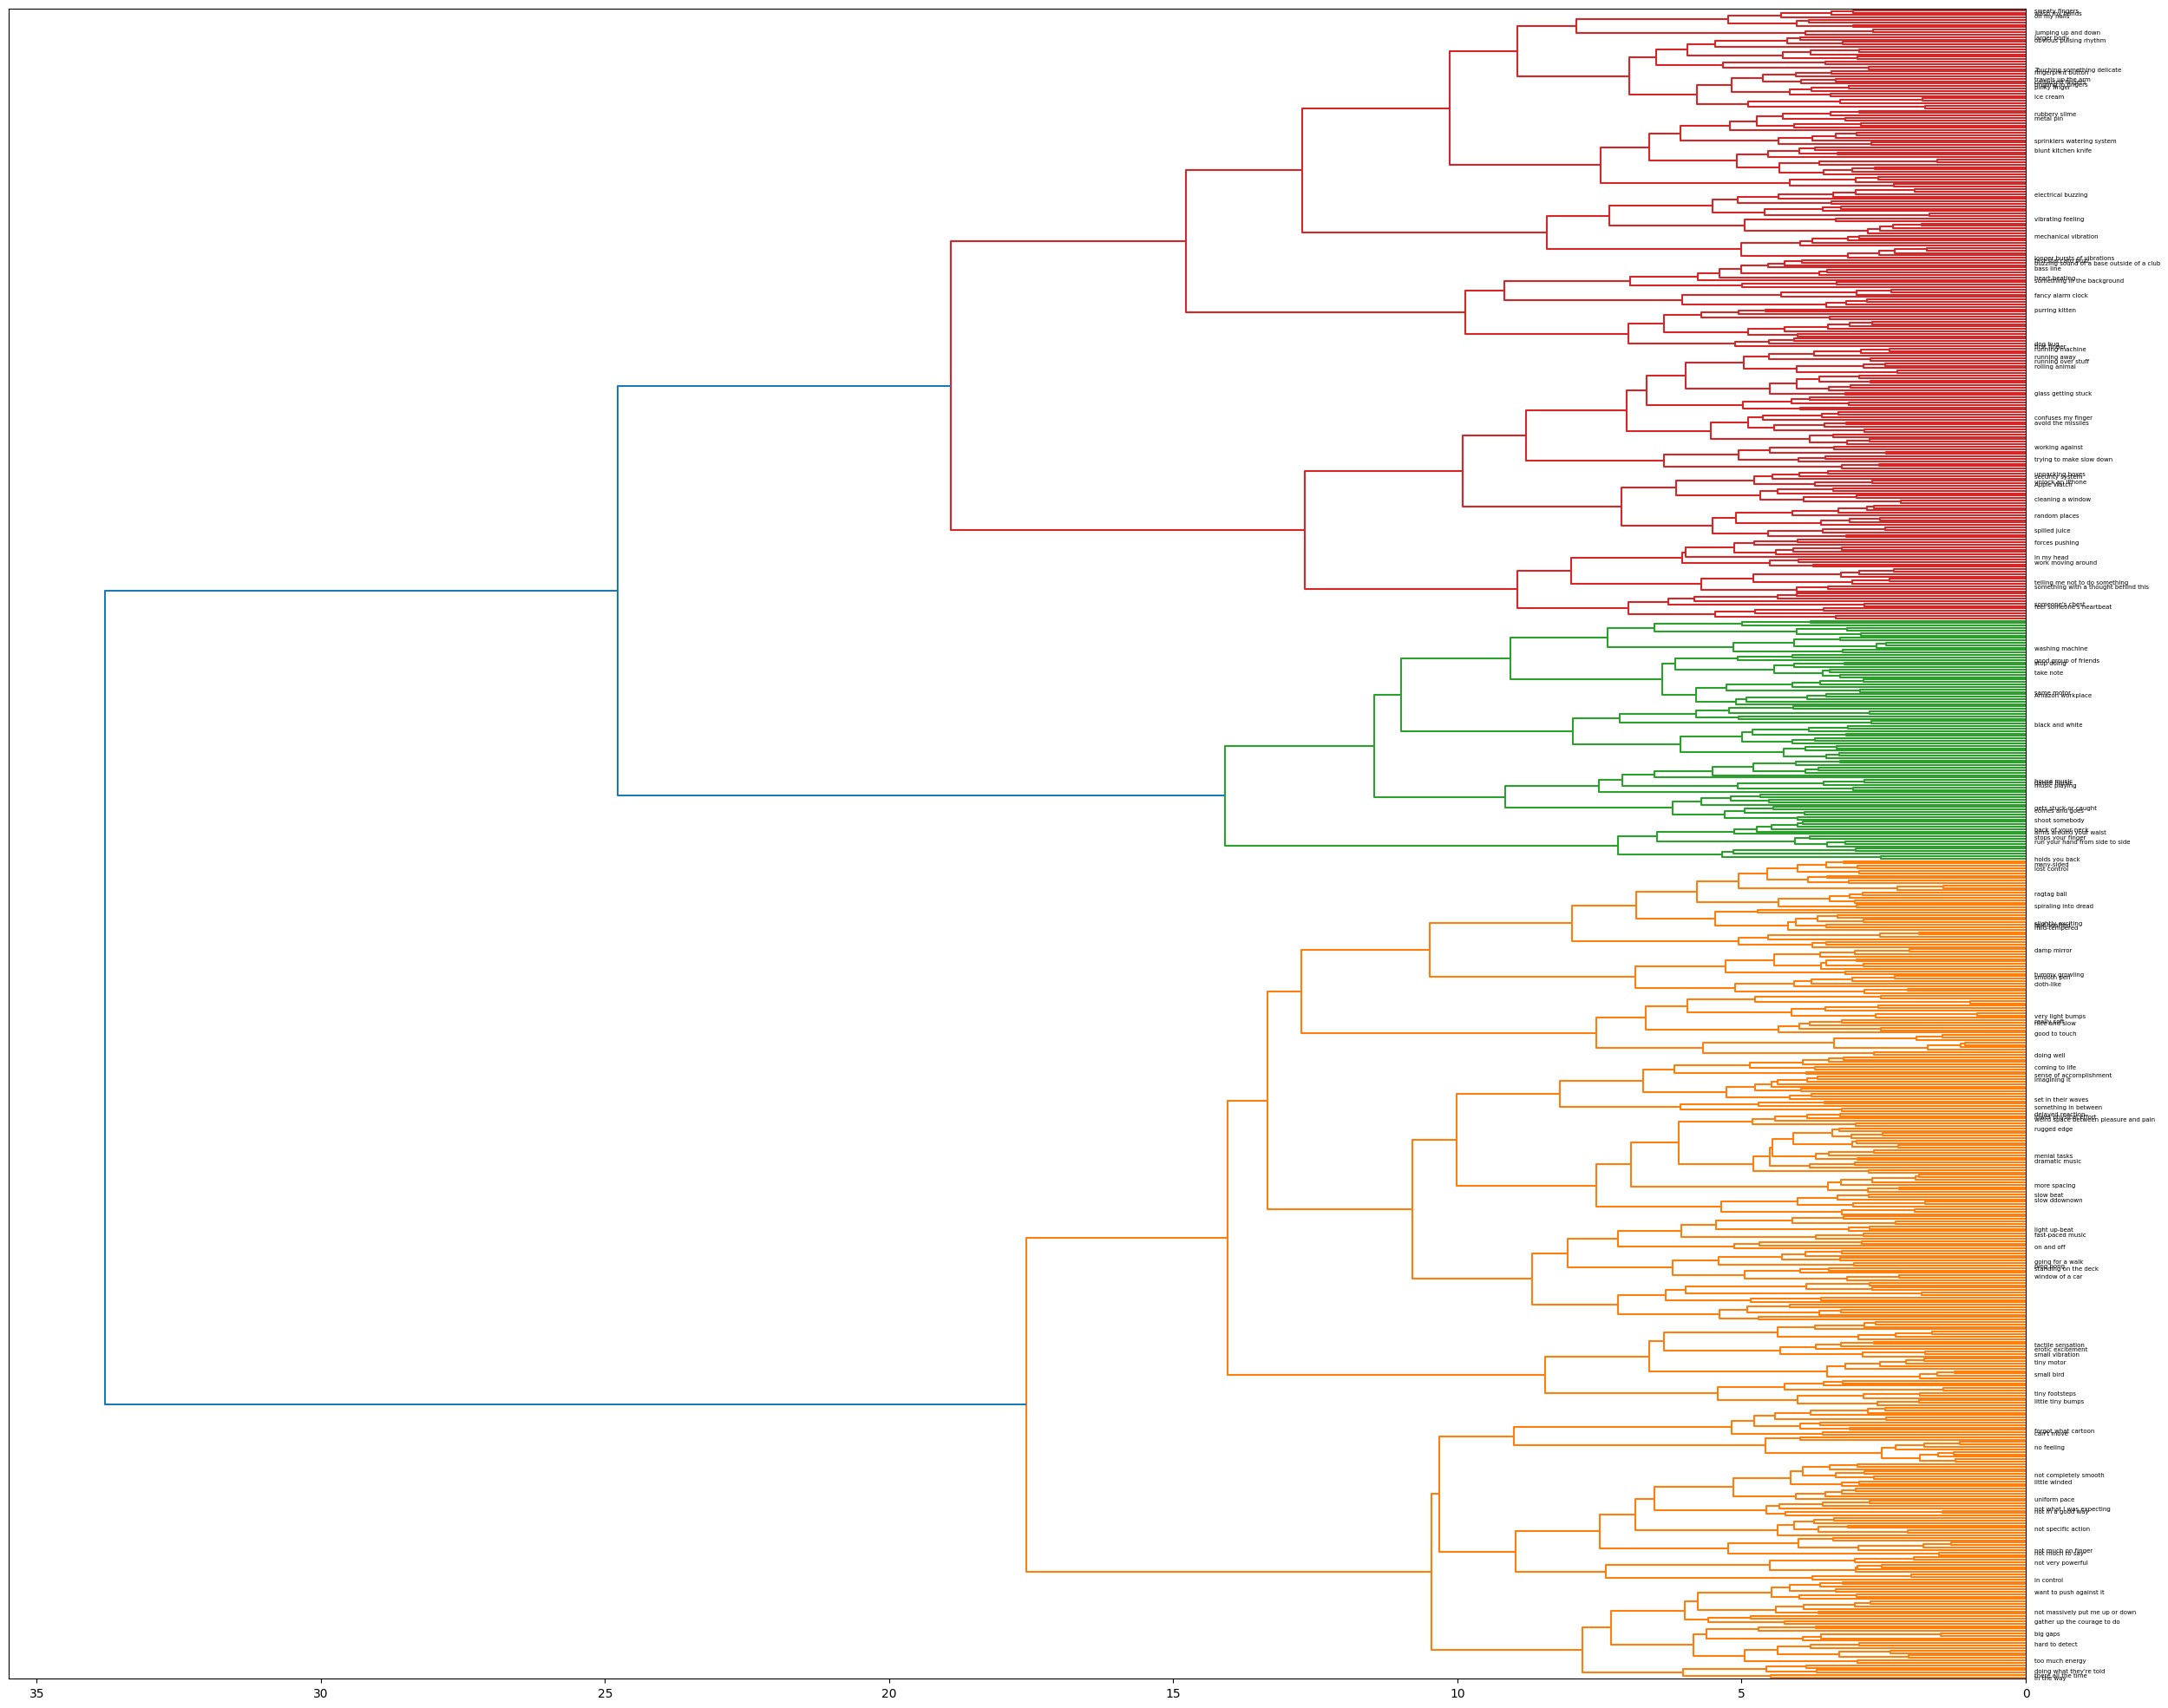

In [ ]:
## bert process phrase
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import BertTokenizer, BertModel


model_name = "bert-base-cased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)
model.eval()  

def get_bert_embedding(text, model, tokenizer):
    inputs = tokenizer("I feel " + text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_phrase_fine_tune_res.csv')
phrases = df['phrases'].tolist()

# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings4 = []
valid_phrases4 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []


phrase_to_antonym_mapping = {}

for phrase in phrases:
    # Process phrase embeddings using fasttext_model
    
    embedding = get_bert_embedding(phrase,model,tokenizer)
    if embedding is not None:
        valid_embeddings4.append(embedding)
        valid_phrases4.append(phrase)
    else:
        missing_phrases.append(phrase)
        
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings4)

linked = linkage(valid_embeddings4, method='ward')

plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases4)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


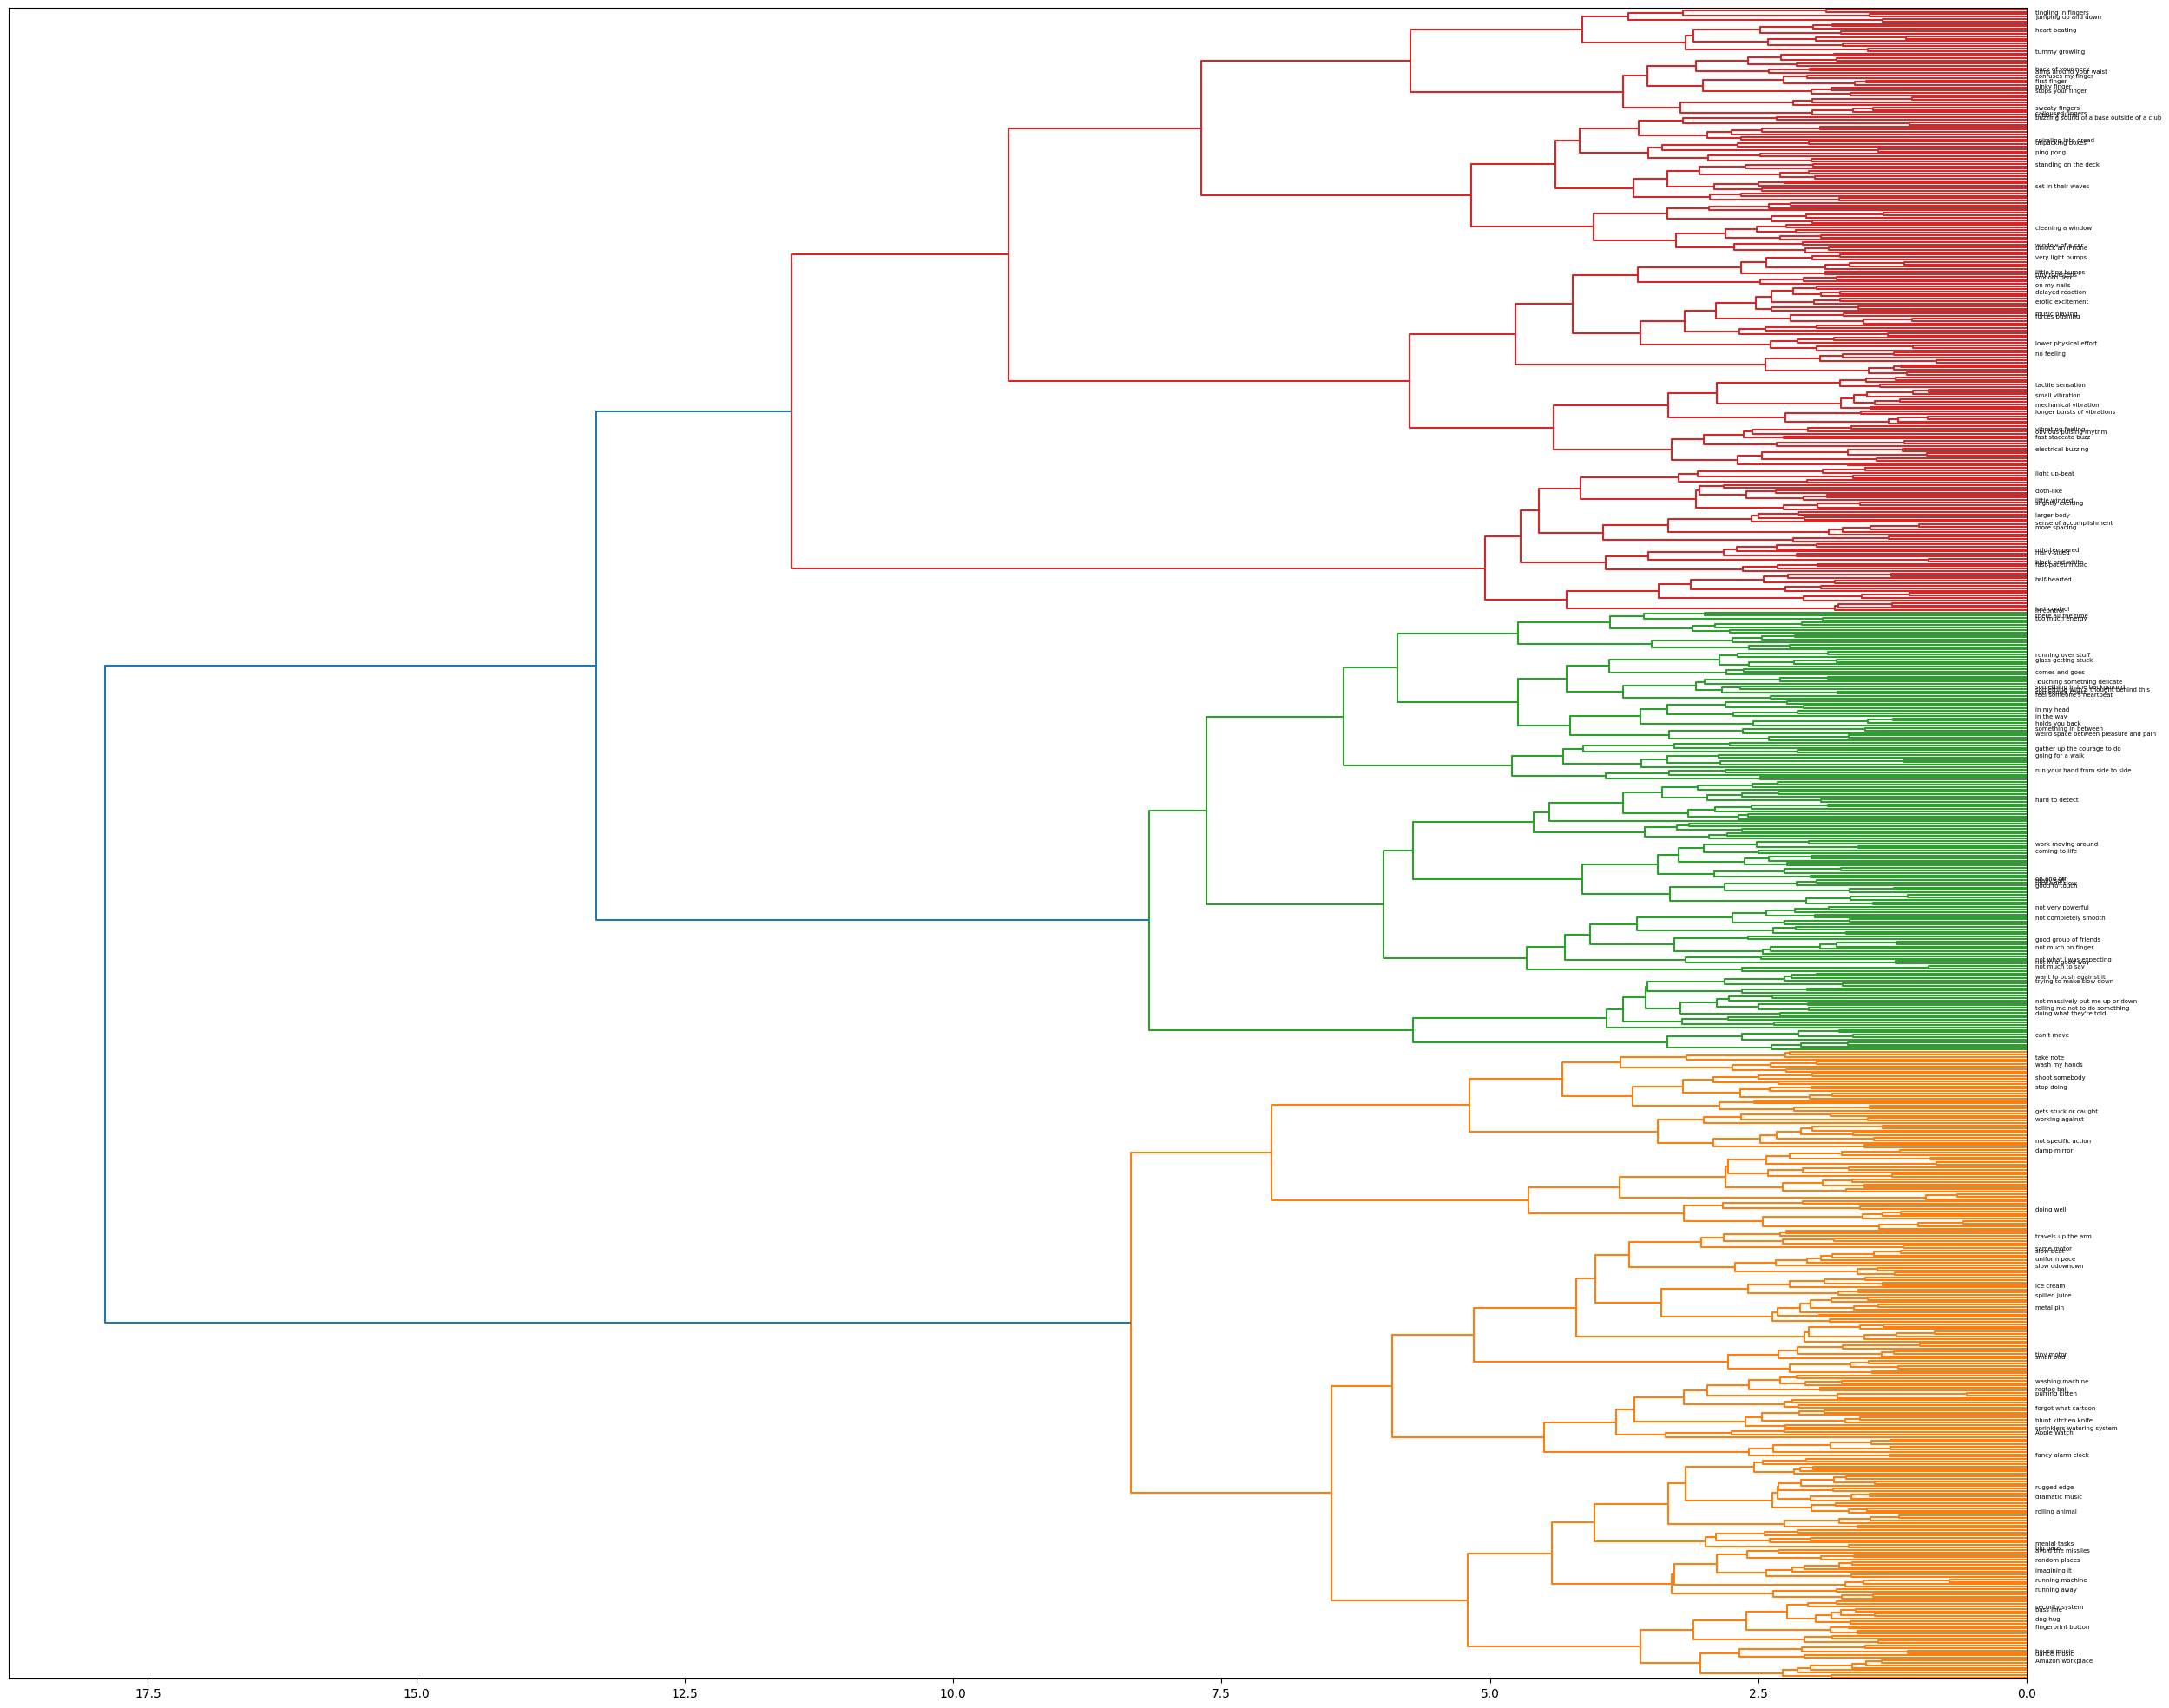

In [ ]:
## roberta phrase
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from transformers import RobertaTokenizer, RobertaModel

model_name = "roberta-base"
model = RobertaModel.from_pretrained(model_name)
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model.eval()  

def get_roberta_embedding(text, model, tokenizer):
    inputs = tokenizer("I feel " + text, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the average of all token embeddings as the embedding of the sentence
    sentence_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return sentence_embedding

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_phrase_fine_tune_res.csv')
phrases = df['phrases'].tolist()

# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings5 = []
valid_phrases5 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []

phrase_to_antonym_mapping = {}

for phrase in phrases:
    # Process phrase embeddings using fasttext_model
    
    embedding = get_roberta_embedding(phrase,model,tokenizer)
    if embedding is not None:
        valid_embeddings5.append(embedding)
        valid_phrases5.append(phrase)
    else:
        missing_phrases.append(phrase)
        
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings5)

linked = linkage(valid_embeddings5, method='ward')

plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases5)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()

Some weights of BertModel were not initialized from the model checkpoint at SpanBERT/spanbert-base-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


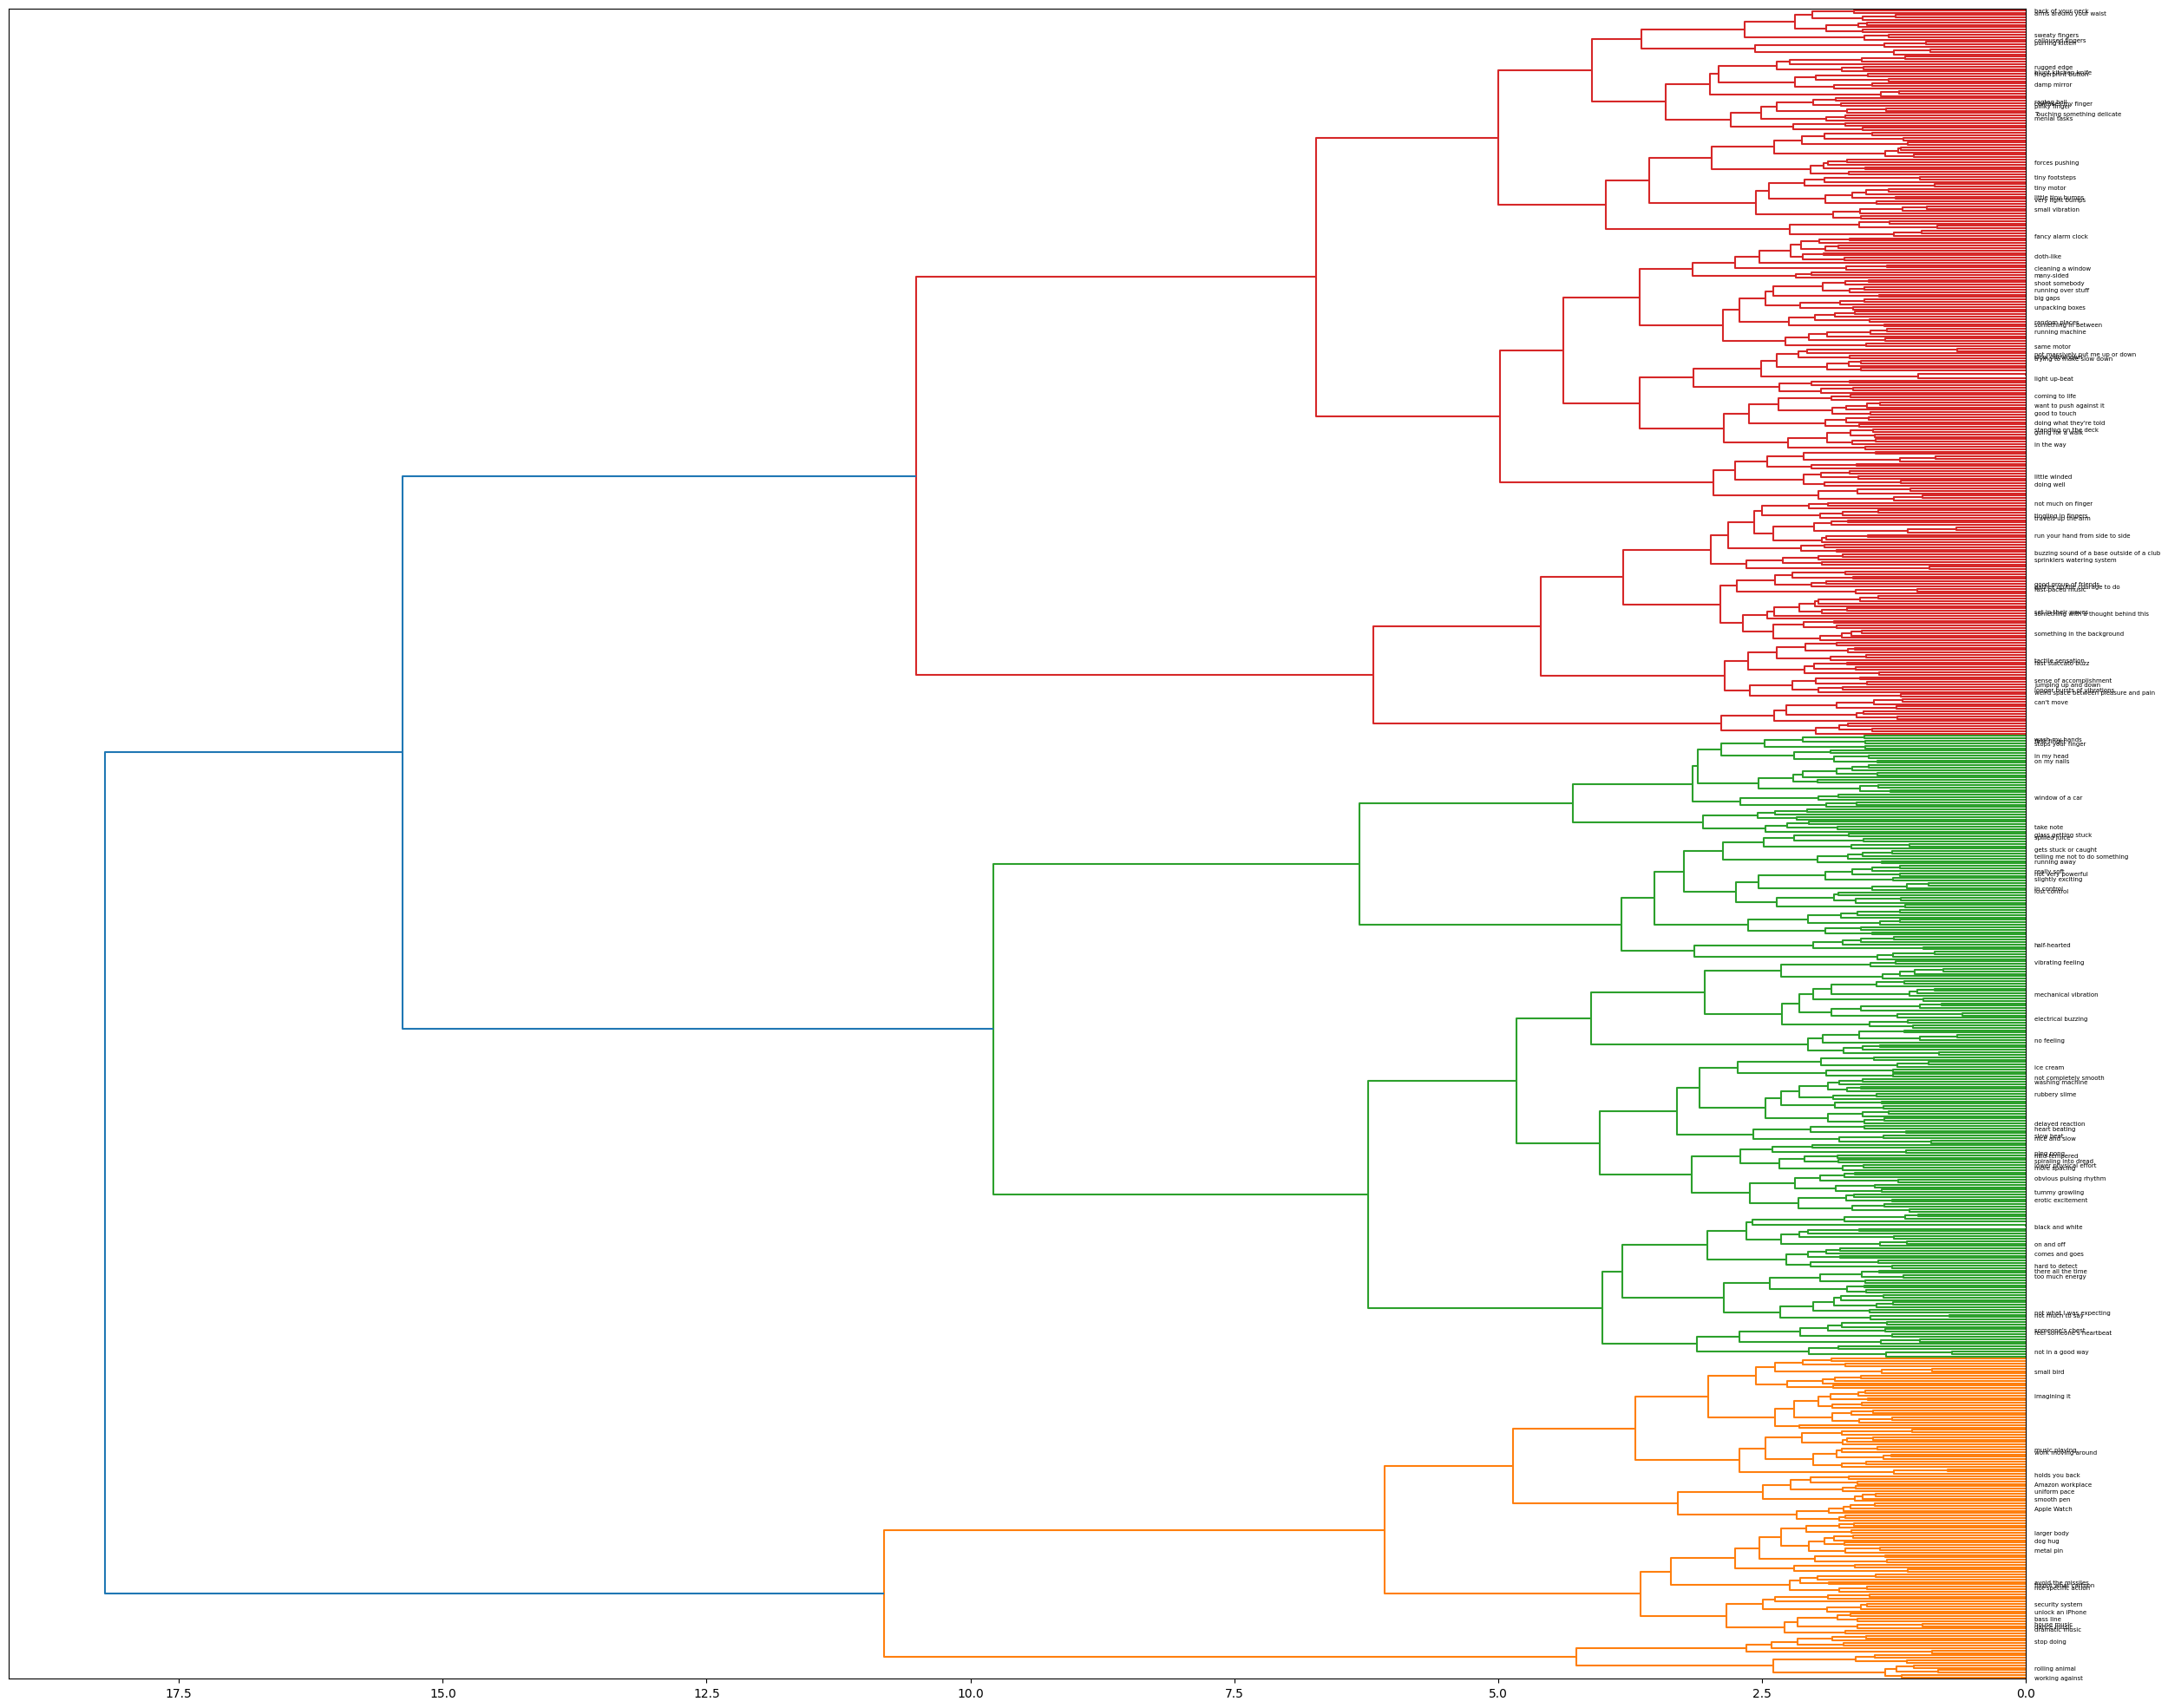

In [ ]:
## SPanbert
import torch
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import wordnet

# Load model directly
from transformers import AutoModel,AutoTokenizer
model = AutoModel.from_pretrained("SpanBERT/spanbert-base-cased")
tokenizer = AutoTokenizer.from_pretrained("SpanBERT/spanbert-base-cased")


def get_spanbert_embedding(text, model, tokenizer):
    inputs = tokenizer("I feel " + text, return_tensors="pt")
    
    with torch.no_grad():
        outputs = model(**inputs)
    # Using [CLS] marked embeddings as sentence embeddings
    sentence_embedding = outputs.last_hidden_state[:, 0, :]
    return sentence_embedding

# Read words with 'Final Sentiment' as Positive from sentiment_results.csv
df = pd.read_csv('processed_phrase_fine_tune_res.csv')
phrases = df['phrases'].tolist()

# Remove duplicate labels
phrases = list(set(phrases))

# Get embeddings and remove phrases with static embedding of 0
valid_embeddings6 = []
valid_phrases6 = []

missing_phrases = []  # Record phrases with static embedding of 0

processed_phrases = []

phrase_to_antonym_mapping = {}

for phrase in phrases:
    # Process phrase embeddings using fasttext_model
    
    embedding = get_roberta_embedding(phrase,model,tokenizer)
    if embedding is not None:
        valid_embeddings6.append(embedding)
        valid_phrases6.append(phrase)
    else:
        missing_phrases.append(phrase)
        
cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(valid_embeddings6)

linked = linkage(valid_embeddings6, method='ward')

plt.figure(figsize=(30, 25))
subset_phrases = [phrase if idx % 5 == 0 else '' for idx, phrase in enumerate(valid_phrases6)]
dendrogram(linked, orientation='left', labels=subset_phrases)

plt.show()

In [ ]:
###The larger the Collaborative Correlation Coefficient (CCC), the better
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet

#Using pdist to calculate the original distance
original_distances = pdist(valid_embeddings5)

#Using Cophenet to Calculate Cophenetic Distances
coph_dists, coph_corr = cophenet(linked, original_distances)

print("Cophenetic Correlation Coefficient:", coph_corr)


Cophenetic Correlation Coefficient: [ 3.76116169 17.90155258 11.50279897 ...  8.34057342 17.90155258
 17.90155258]


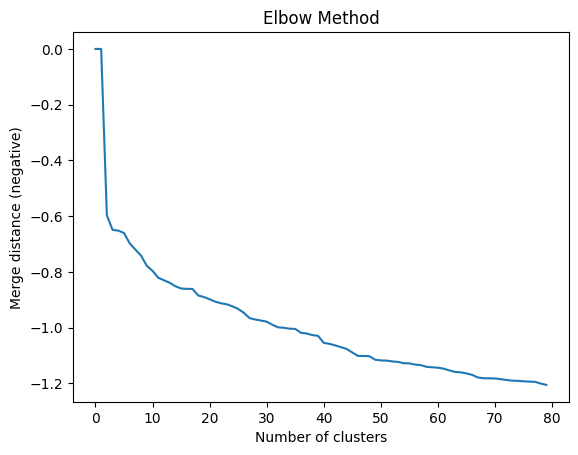

In [ ]:
## elbow method

distances = linked[:80, 2]
inverse_distances = -distances
plt.plot(inverse_distances)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Merge distance (negative)')
plt.show()


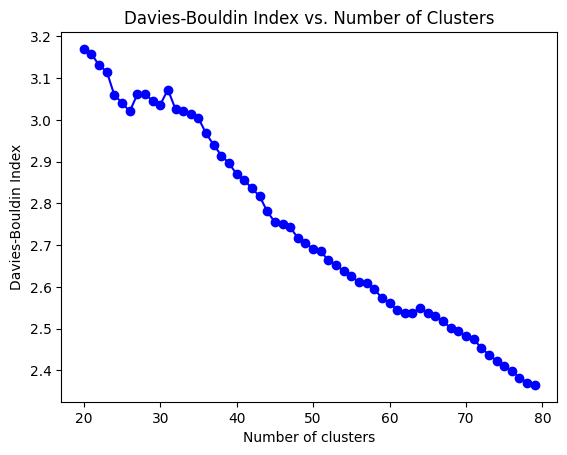

In [ ]:
## Davies-Bouldin Index, smaller the better
from sklearn.metrics import davies_bouldin_score

cluster_range = range(20, 80) # assuming you want to check for up to 15 clusters
db_scores = []

for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(valid_embeddings6)
    db_score = davies_bouldin_score(valid_embeddings6, cluster_labels)
    db_scores.append(db_score)

plt.plot(cluster_range, db_scores, 'bo-')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()


In [ ]:
print(len(valid_embeddings4))
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

possible_n_clusters = range(20,40)  

sil_scores = []


for num_clusters in possible_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=num_clusters)
    preds = clusterer.fit_predict(valid_embeddings4)
    
    
    score = silhouette_score(valid_embeddings4, preds)
    print(score)
    sil_scores.append(score)


best_num_clusters = possible_n_clusters[np.argmax(sil_scores)]
print(f"Best number of clusters: {best_num_clusters}")

108
0.034571126
0.03720947
0.0412684
0.044505745
0.047839906
0.04996026
0.05359021
0.05749762
0.059560254
0.061732385
0.06343376
0.06586331
0.06712798
0.07007151
0.07111653
0.07174383
0.07357066
0.075017005
0.07615544
0.07756535
Best number of clusters: 39


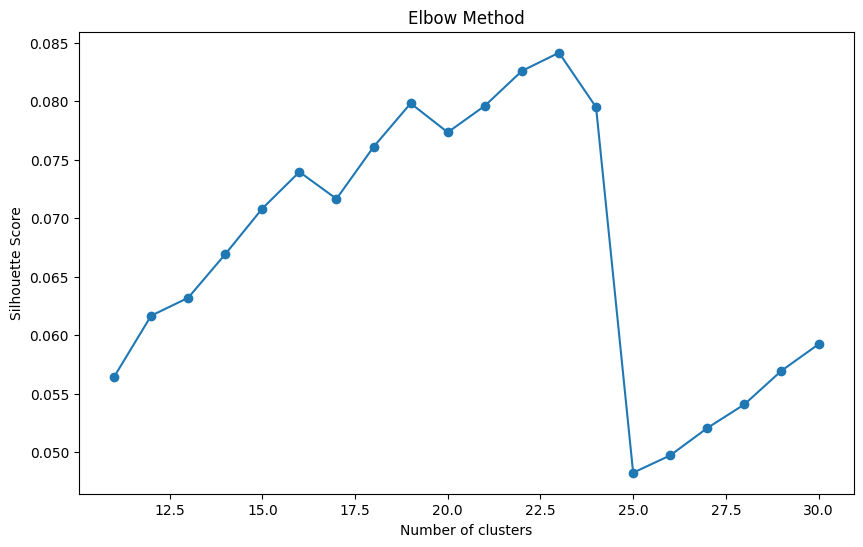

In [10]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

scores = []

cluster_range = range(11,31)

for n_clusters in cluster_range:
    cluster = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None).fit(valid_embeddings4)
    silhouette_avg = silhouette_score(valid_embeddings4, cluster.labels_)
    scores.append(silhouette_avg)

plt.figure(figsize=(10,6))
plt.plot(cluster_range, scores, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering


cluster = AgglomerativeClustering(n_clusters=13, distance_threshold=None).fit(valid_embeddings4) ###31 48 60

clusters = {i: [] for i in range(cluster.n_clusters)}

for label, phrase in zip(cluster.labels_, valid_phrases4):
    clusters[label].append(phrase)

cluster_dict = {}


for cluster_id, cluster_phrases in clusters.items():
    cluster_dict[f"Cluster_{cluster_id}"] = cluster_phrases


max_length = max(len(v) for v in cluster_dict.values())
for key, value in cluster_dict.items():
    value.extend([None] * (max_length - len(value)))


df_clusters = pd.DataFrame(cluster_dict)


df_clusters.to_csv("cn2_negative_clusters.csv", index=False)


In [ ]:
## clustering result visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.cluster import AgglomerativeClustering
n_clusters=68

cluster = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None).fit(valid_embeddings4) ###
labels = cluster.labels_
print(labels)

all_embeddings_np = np.vstack(valid_embeddings4) ###
print(all_embeddings_np)
tsne_model = TSNE(perplexity=40, n_components=3, init='pca', n_iter=2500, random_state=23)
low_dim_data = tsne_model.fit_transform(all_embeddings_np)


[58 39 18 60 24 40  8  7 44 56  0 20 12 27 11 16 36 11  5 10 23  2  0 56
 59 15 53 11 15 63 18  0 29 30 16  3 48 16 24 53 67 30 27 34 48 54 29 20
 15 46 23 48 63 17 35  6  1  8 22  9 10 37  1 37 12 30 30 62 15 28 29 29
 19 30 30 18 15 51 20  1 54 44 33 24 25  5 32 21 37 14  3 61  7  1 21  0
 12  2 26 29 35 65 15 48 26 15 63 25 15 13 55 66 64  0 30 60 31 53  1 12
 14  0 51 10  8  6 36 27 58 60 61 26 11 15 23 58  1 33 51 30 29 48  6 37
 51 58 16  6 14 29 11 23 30 18 21 34 27 34 35 63 64 23 15  3 53 38 14 53
 20 67 28  2  9  8  4  7  8 15 43 30 50 48  4 64 18 16  6 11 61 22 15 28
 61  1  5 49 27  0  1 29 29 39 48 51 30 43 58 60  8 61 52 48 37 26 21  1
 16 55 12 12 62 41 32 48 40  7 14 11 66 66 58  7 64 33  4 11 60 15 15 47
  1 44  2 47 32 23 15 18 29 23 58 13 55  2 44  0 59 14  0 15 64 17 63 53
 51  1 17 41 52 12 48 18 30 40  2 29 15  7 47 35 65 51 15 10 58 19 28 64
  0 53 18 63 49 31 14 39  6  3 37  0  7  1 18 24 29 26  6 65 11 27 13  1
 35  0 55  0  6 65 12 11 19  1 13  0  1 17 67 45 21

Python(24968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [ ]:
import plotly.graph_objects as go

text = []
print(valid_phrases4) ###
for phrase, label in zip(valid_phrases4, labels): ###
    text.append('words: ' + phrase + ' label: ' + str(label))

fig = go.Figure(data=[
    go.Scatter3d(
        x=low_dim_data[:, 0],
        y=low_dim_data[:, 1],
        z=low_dim_data[:, 2],
        mode='markers',
        marker=dict(size=2, color=labels),
        text=text, 
        hoverinfo='text'
    )
])

fig.update_layout(title="3D t-SNE Visualization with Words", width=800, height=600)
fig.show()


['calloused fingers', 'moving my finger', 'downstairs neighbor', 'less deep', 'chill out', 'doing well', 'talk deeply', 'stroll on the beach', 'pane of glass', "something's coming up", 'small bird', 'long sensation', 'computer screen', 'bounce back', 'Petting dog', 'sprinklers watering system', 'bad bit', "don't go", 'brush your feet', 'small alarm clock', 'shoot somebody', 'science museums', 'little dog', 'something wrong', 'phone vibrates', 'dramatic music', 'painted furniture', 'last one', 'ant-eater-type', 'tiny millipede', 'forces pushing', 'gentle buzz', 'rubbing a balloon', 'not nudging in a certain direction', 'squeaking noise', "feel someone's heartbeat", 'On even', 'rubber boots', 'not gently woken up', 'snow ice pieces', 'blunt kitchen knife', 'get rid of', 'sticking to their guns', 'background noise', 'different on each finger', 'dance music', 'stuck in the mud', 'long time', 'run it around', 'cleaning kitchen', 'comes and goes', 'eights in that with my finger', 'tiny littl

In [ ]:
## processed_sentiment converted to lowercase
import pandas as pd


df = pd.read_csv("processed_with_antonyms3.csv") ###这个是合并了pos和neg的反义词，是手工合并的
#df = pd.read_csv("processed_phrase_fine_tune_res.csv") 

#  for FastText
#df = pd.read_csv("processed_un_sentiment_results.csv")

df['filtered_words'] = df['filtered_words'].str.lower()

#Match the order of signals with the order of signals in the sequence one by one
sequences_df = pd.read_csv("sequences.csv", header=None)

# According to sentiment_ Find sequences using the Signal value and Participants in df_ New Signal value in df
def get_new_signal(row):
    # Get the current Signal value
    current_signal = row['Signal']
    # Get the current Participants value
    participant = row['Participants']
    # Return sequences_df The corresponding new Signal value 
    return sequences_df.iloc[participant-1, current_signal-1]


df['Signal'] = df.apply(get_new_signal, axis=1)

df.to_csv("processed_uncase_sentiment_results3.csv", index=False)
#df.to_csv("processed_phrase_32_signal.csv", index=False)


In [ ]:
# add cluster attribute

import pandas as pd

sentiment_df = pd.read_csv('processed_uncase_sentiment_results.csv')
positive_clusters_df = pd.read_csv('g3_pos_clusters.csv')
negative_clusters_df = pd.read_csv('g3_neg_clusters.csv')

def get_cluster(row):
    if row['Final Sentiment'] == 'Positive':
        clusters_df = positive_clusters_df
    elif row['Final Sentiment'] == 'Negative':
        clusters_df = negative_clusters_df
    else:
        return None

    for column in clusters_df.columns:
        if row['filtered_words'] in clusters_df[column].tolist():
            return column.split('_')[-1] 

    return None

sentiment_df['Cluster'] = sentiment_df.apply(get_cluster, axis=1)

sentiment_df.to_csv('g3_processed_uncase_sentiment_results.csv', index=False)


In [12]:
## caculate coverage
import pandas as pd


sentiments = pd.read_csv("processed_uncase_sentiment_results3.csv")
clusters = pd.read_csv("cn2_negative_clusters.csv")

# Calculate the word coverage of each Cluster in each Signal
results = []

unique_signals = sentiments['Signal'].unique()
for signal in unique_signals:
    filtered_words_for_signal = sentiments[sentiments['Signal'] == signal]['filtered_words'].tolist() ###
    coverage = {'Signal': signal}
    
    for cluster_col in clusters.columns:
        cluster_words = clusters[cluster_col].dropna().tolist()
        covered_words = set(filtered_words_for_signal) & set(cluster_words)
        coverage_rate = len(covered_words) / len(cluster_words) if cluster_words else 0
        coverage[cluster_col] = coverage_rate
    
    results.append(coverage)

coverage_df = pd.DataFrame(results)


coverage_df.to_csv("coverage_cn2_neg_results.csv", index=False)


In [ ]:
import pandas as pd


df = pd.read_csv("/Users/zhaozirui/Desktop/ASU-visiting student/features.csv")


for column in df.columns:
    if column != 'id':
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())


df.to_csv("normalized_features.csv", index=False)


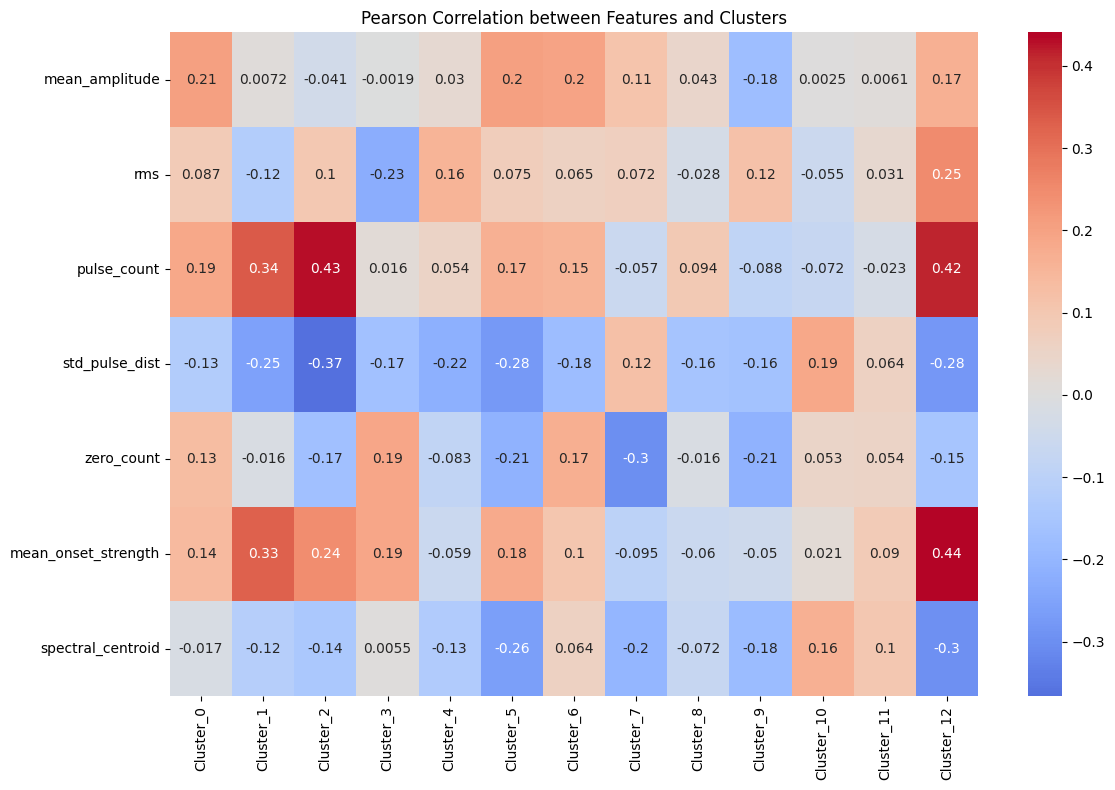

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = pd.read_csv("normalized_features.csv")
coverage = pd.read_csv("coverage_cn2_neg_results.csv")

#Ensure that the two files are aligned according to the Signal column
merged_data = features.merge(coverage, on='Signal')

# Pearson correlation
correlation_matrix = merged_data.corr()
clusters = [col for col in coverage.columns if col.startswith("Cluster")]
correlation_results = correlation_matrix[clusters].loc[features.columns[1:]]  # 从索引1开始，因为索引0是Signal列

# heatmap
plt.figure(figsize=(12, 8)) ###
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', center=0)
plt.title("Pearson Correlation between Features and Clusters")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


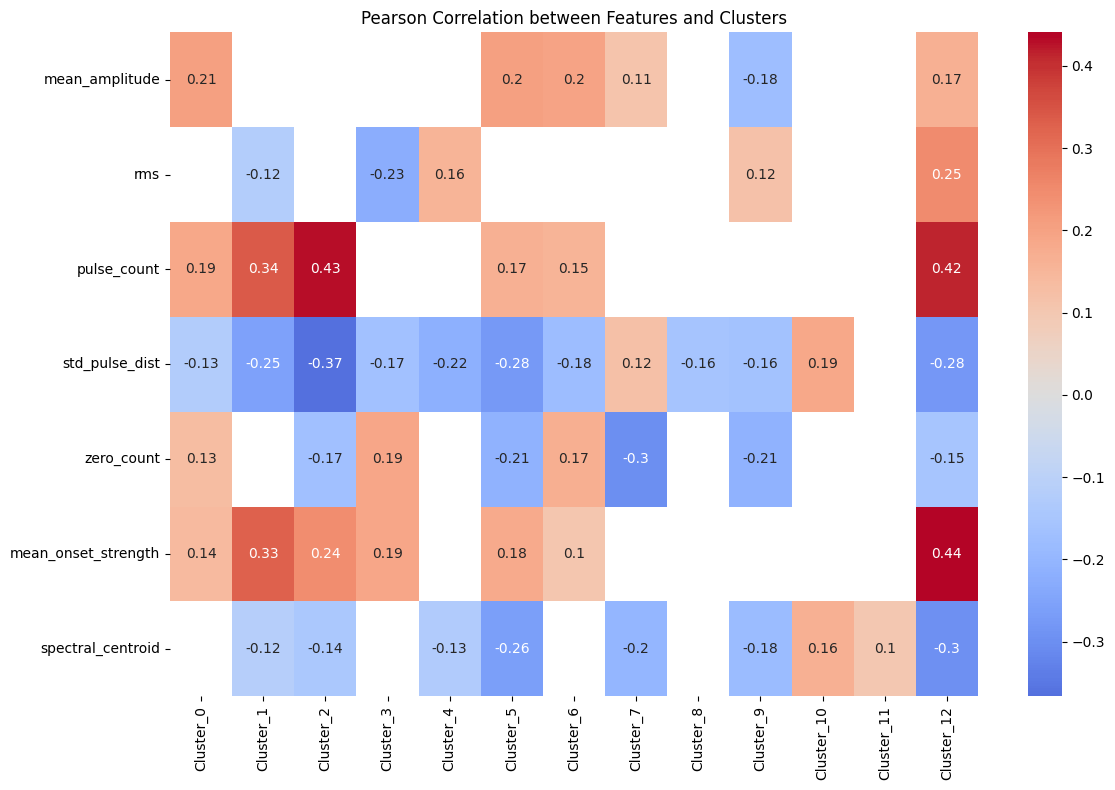

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features = pd.read_csv("normalized_features.csv")
coverage = pd.read_csv("coverage_cn2_neg_results.csv")

merged_data = features.merge(coverage, on='Signal')

correlation_matrix = merged_data.corr()
clusters = [col for col in coverage.columns if col.startswith("Cluster")]
correlation_results = correlation_matrix[clusters].loc[features.columns[1:]]  # 从索引1开始，因为索引0是Signal列

# #Create a mask where values greater than or equal to 0.1 or less than or equal to -0.1 are False and all other values are True
mask = (correlation_results >= 0.1) | (correlation_results <= -0.1)
mask = ~mask  #Invert the mask because we want to mask the True value

#Display correlation coefficients using heatmaps and mask unnecessary values using mask parameters
#plt.figure(figsize=(12, 8))###
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_results, annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title("Pearson Correlation between Features and Clusters")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

correlation_results.to_csv("pearson_correlation_results.csv")


In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=12, distance_threshold=None).fit(valid_embeddings4)###

# Create a dictionary to store the total embeddings and counts for each cluster
embeddings_sum = {i: np.zeros_like(valid_embeddings4[0]) for i in range(cluster.n_clusters)}###
embeddings_count = {i: 0 for i in range(cluster.n_clusters)}

#Calculate the total embedding and count for each cluster
for label, embedding in zip(cluster.labels_, valid_embeddings4):###
    embeddings_sum[label] += embedding
    embeddings_count[label] += 1

average_embeddings = {i: embeddings_sum[i] / embeddings_count[i] for i in range(cluster.n_clusters)}

df_average_embeddings = pd.DataFrame.from_dict(average_embeddings, orient='index')

# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(df_average_embeddings)

df_cosine_sim = pd.DataFrame(cosine_sim_matrix)

df_cosine_sim.to_csv("cn2_pos_cosine_similarity.csv", index=False)
